In [27]:
import os
import json
import tqdm
from pprint import pprint

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd

from collections import defaultdict

In [28]:
def extract_log(dataset, model, task_id):
    target_dir = os.path.join("log", dataset)
    file_names = os.listdir(target_dir)
    case_dict = defaultdict(dict)
    for fname in file_names:
        fname_decomp = fname.split('-')
        ftask_id = fname_decomp[0]
        fmodel, ftype = fname_decomp[-1].split('.')
        select_flag = (ftask_id == task_id) and (fmodel == model)
        if not select_flag:
#             print("file {} skiped".format(fname))
            continue
        data_key = dataset + ftask_id + fmodel +''.join(fname_decomp[1:-1])
        if ftype == "meta":
            with open(os.path.join(target_dir, fname), mode='rt') as f:
                case_dict[data_key]['meta'] = json.load(f)
        if ftype == "log":
            df = pd.read_csv(os.path.join(target_dir, fname))
            df.columns = [c.strip() for c in df.columns]
            case_dict[data_key]['log'] = df
    return case_dict

In [29]:
def plot_along_epoch(case_dict, 
                     col_of_interests=["val_acc", "test_acc"], 
                     key_var='v',
                     key_var_name='v', 
                     key_var_filter=lambda x: True, 
                     case_meta_filter=lambda x: True, 
                     ax=plt):
    plot_order = []
    selected_case_keys = sorted([k for k in case_dict.keys() 
                                 if case_meta_filter(case_dict[k]['meta']) and key_var_filter(case_dict[k]['meta'][key_var])],
                               key=lambda x: case_dict[x]['meta'][key_var])
    for k in selected_case_keys:
        case = case_dict[k]
        cols = case['log'][col_of_interests]
        for c in col_of_interests:
            x = np.arange(len(cols[c]))
            ax.plot(x, cols[c], label="{} = {}".format(key_var_name, case['meta'][key_var]))
    ax.legend()

In [30]:
def get_stats_df(case_dict):
    df = None
    for k, case in case_dict.items():
        record_dict = {"key": k}
        record_dict.update(case['meta'])
        if df is None:
            df = pd.DataFrame(columns=list(record_dict.keys()))
        df = df.append(record_dict, ignore_index=True)
    return df

# CIFAR 10

In [31]:
case_dict_cifar10 = extract_log("CIFAR10", "ResNet18", "Noisy_study")
sdf_cifar10 = get_stats_df(case_dict_cifar10)
sdf_cifar10

key  dataset     model      task_id  \
0    CIFAR10Noisy_studyResNet18200112160938  CIFAR10  ResNet18  Noisy_study   
1    CIFAR10Noisy_studyResNet18200110201017  CIFAR10  ResNet18  Noisy_study   
2    CIFAR10Noisy_studyResNet18200109193452  CIFAR10  ResNet18  Noisy_study   
3    CIFAR10Noisy_studyResNet18200112160200  CIFAR10  ResNet18  Noisy_study   
4    CIFAR10Noisy_studyResNet18200110163003  CIFAR10  ResNet18  Noisy_study   
..                                      ...      ...       ...          ...   
236  CIFAR10Noisy_studyResNet18200112161004  CIFAR10  ResNet18  Noisy_study   
237  CIFAR10Noisy_studyResNet18200112005832  CIFAR10  ResNet18  Noisy_study   
238  CIFAR10Noisy_studyResNet18200110053102  CIFAR10  ResNet18  Noisy_study   
239  CIFAR10Noisy_studyResNet18200109012938  CIFAR10  ResNet18  Noisy_study   
240  CIFAR10Noisy_studyResNet18200110161111  CIFAR10  ResNet18  Noisy_study   

    cuda  eps      lr    v batch_size num_epochs  noise_ratio  alpha  auto  
0      1  1.9  0.0001  0.2        128        100          0.2 -0.900  True  
1      1  1.9  0.0001  0.5        128        100          0.8 -0.999  True  
2      4  1.9  0.0001  4.0        128        100          0.4 -1.000  True  
3      2  1.9  0.0001  0.4        128        100          0.8  1.000  True  
4      3  1.9  0.0001  2.0        128        100          0.8 -1.000  True  
..   ...  ...     ...  ...        ...        ...          ...    ...   ...  
236    1  1.9  0.0001  0.2        128        100          0.6 -0.990  True  
237    3  1.9  0.0001  0.1        128        100          0.0 -1.000  True  
238    2  1.9  0.0001  1.0        128        100          0.4  1.000  True  
239    1  1.9  0.0001  0.5        128        100          0.0 -1.000  True  
240    4  1.9  0.0001  4.0        128        100          0.8 -0.999  True  

[241 rows x 13 columns]

/Users/zihao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


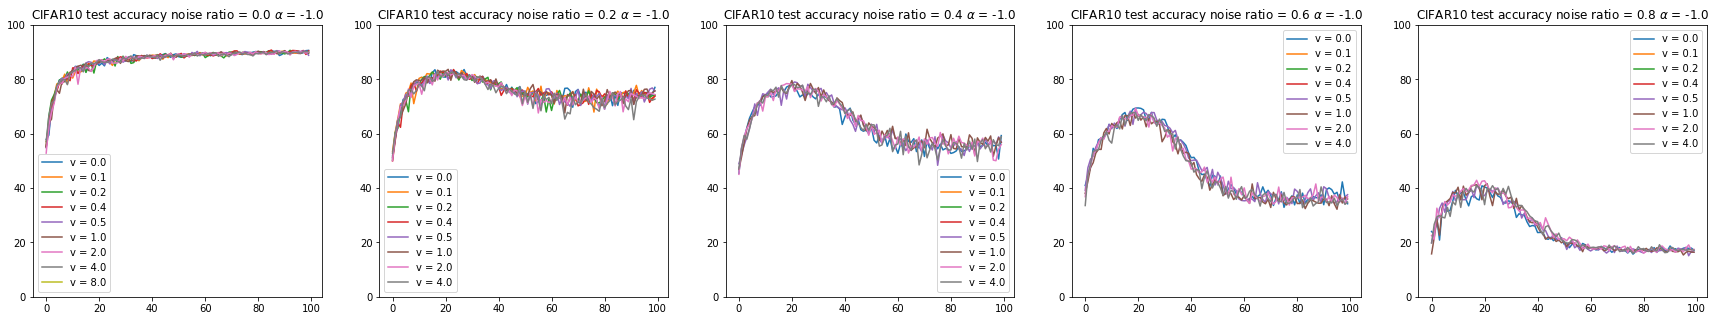

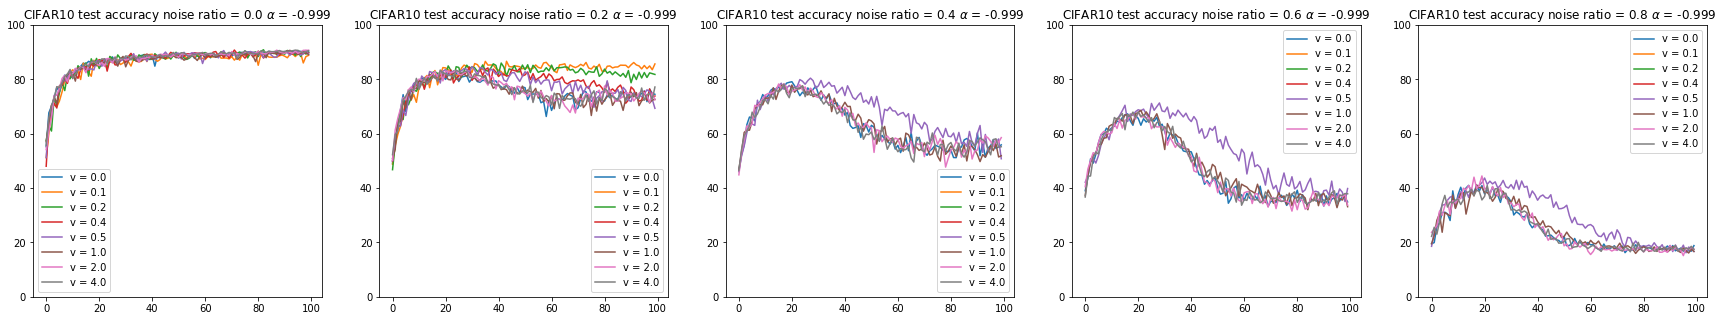

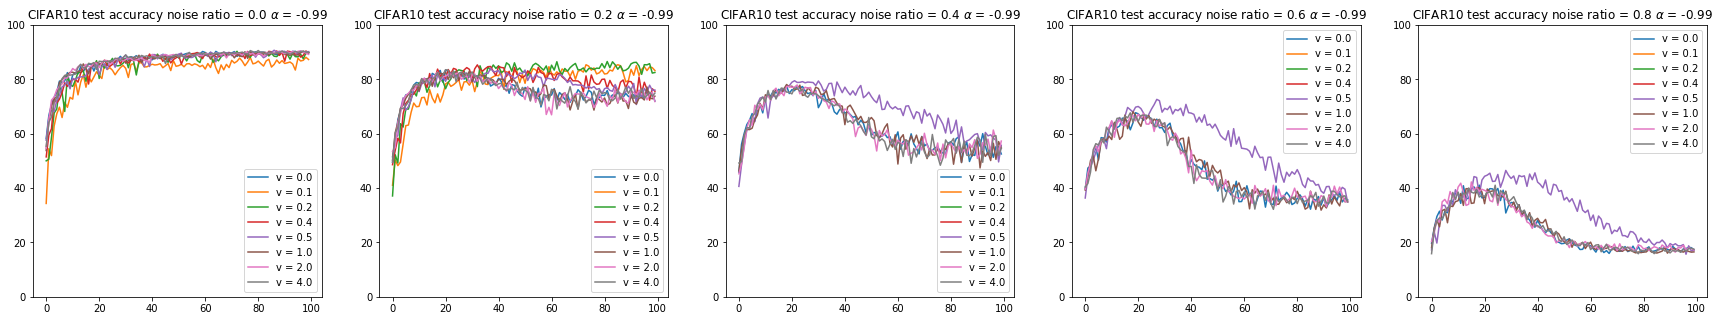

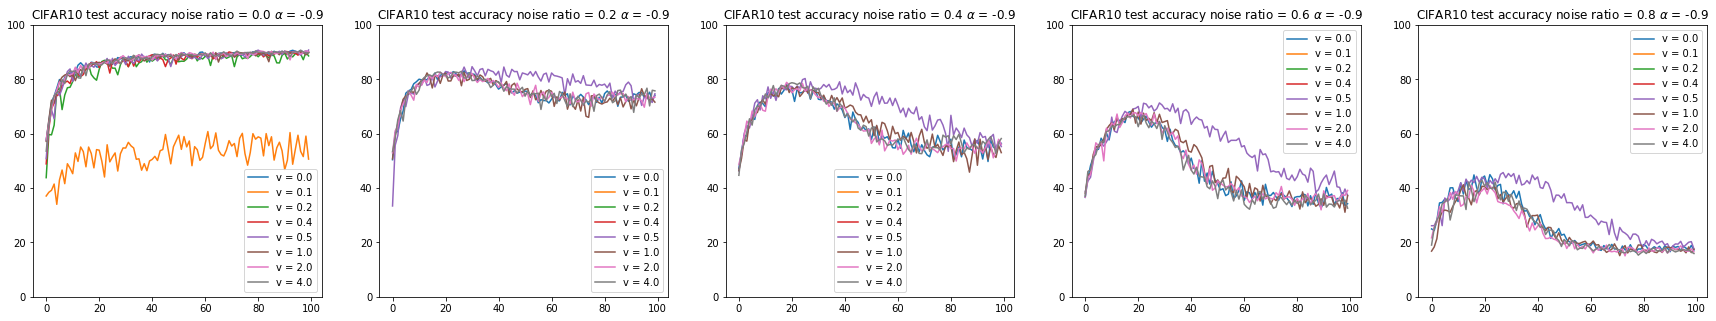

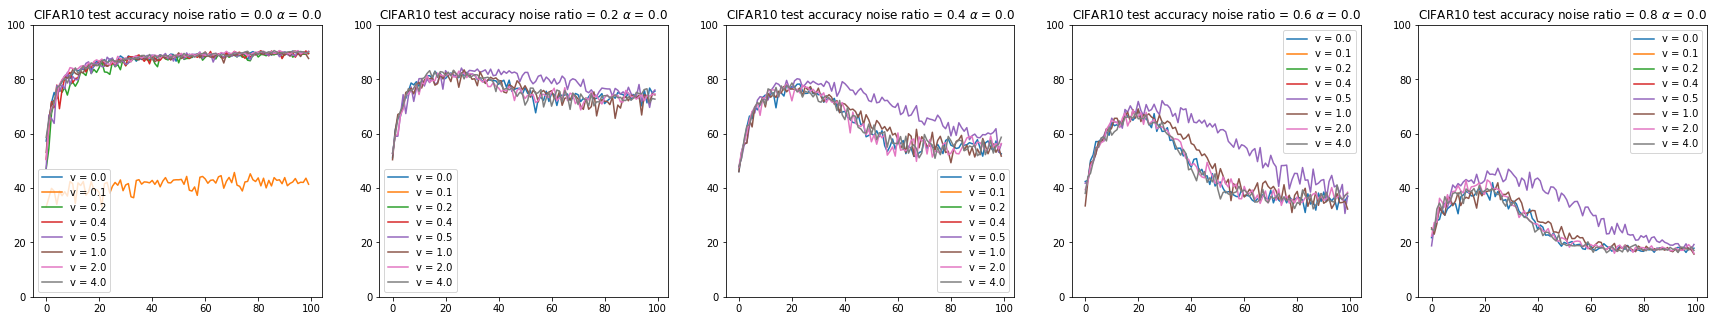

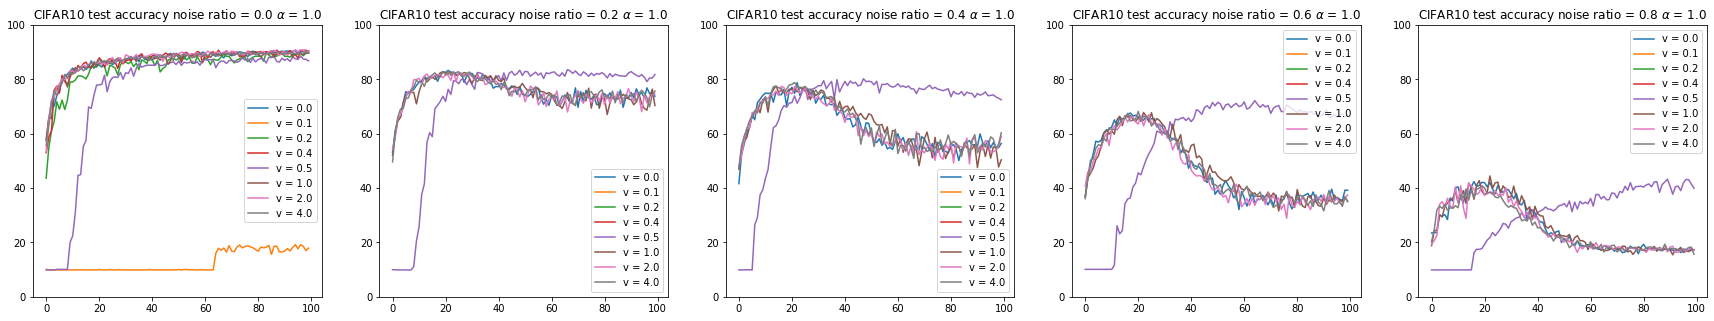

In [34]:
nr_list = sorted(list(sdf_cifar10['noise_ratio'].unique()))
alpha_list = sorted(list(sdf_cifar10['alpha'].unique()))
for alpha in alpha_list:
    fig, ax = plt.subplots(1, len(nr_list), figsize=(30, 5))
    for i, nr in enumerate(nr_list):
        plot_along_epoch(case_dict_cifar10, col_of_interests=['test_acc'], case_meta_filter=lambda x: (x['noise_ratio'] == nr and x['alpha'] == alpha), ax=ax[i])
        ax[i].set_title(r'CIFAR10 test accuracy noise ratio = {} $\alpha$ = {}'.format(nr, alpha))
        ax[i].set_ylim([0, 100])
    fig.show()

/Users/zihao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


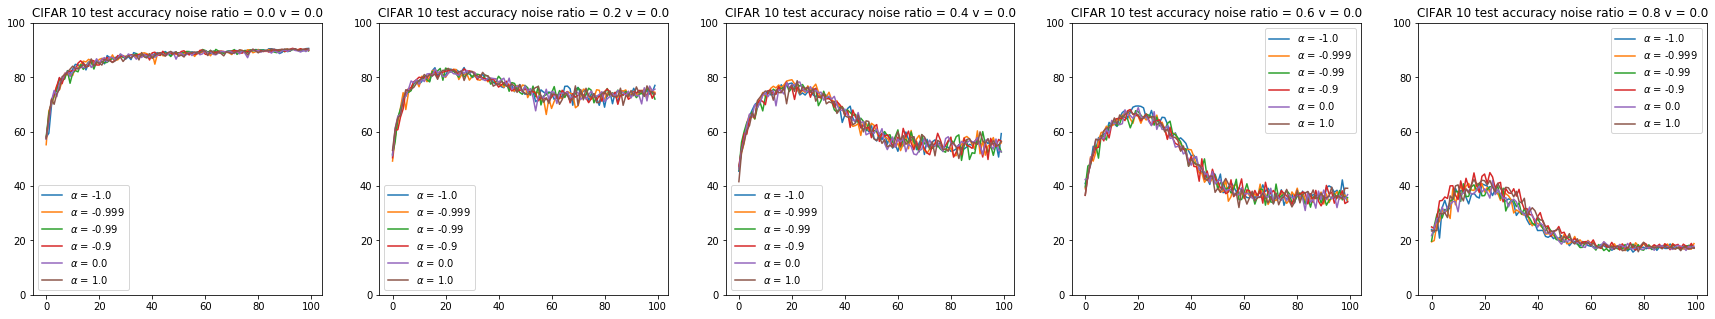

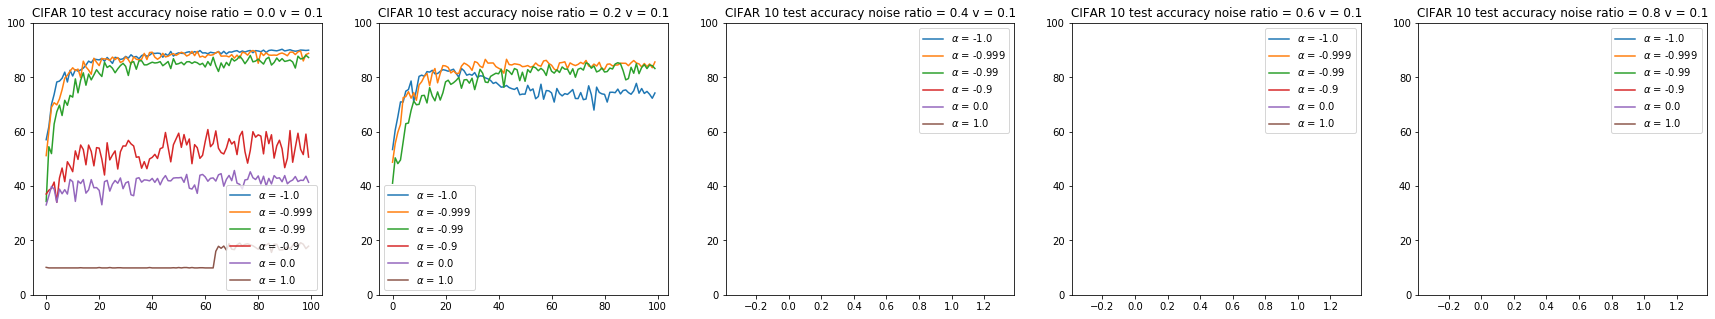

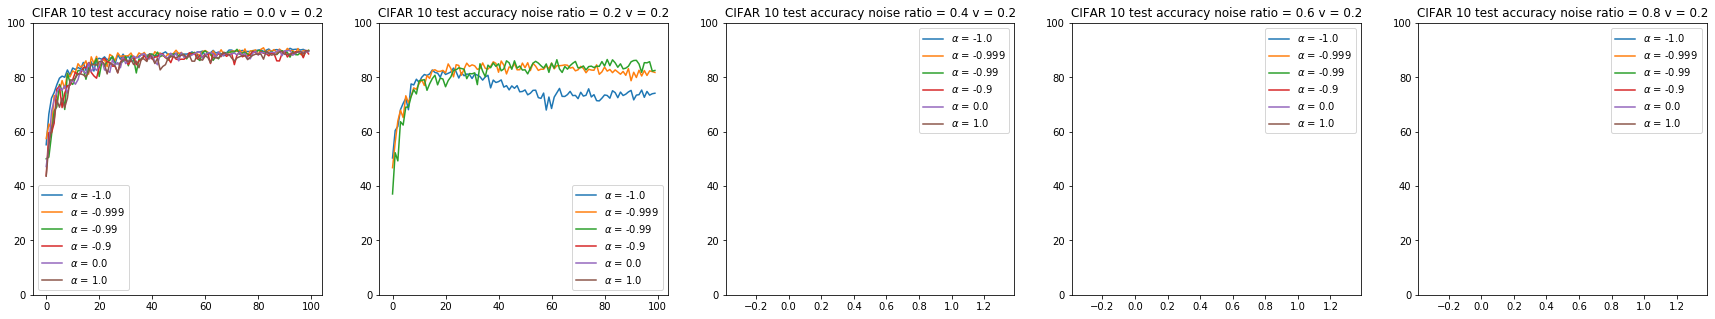

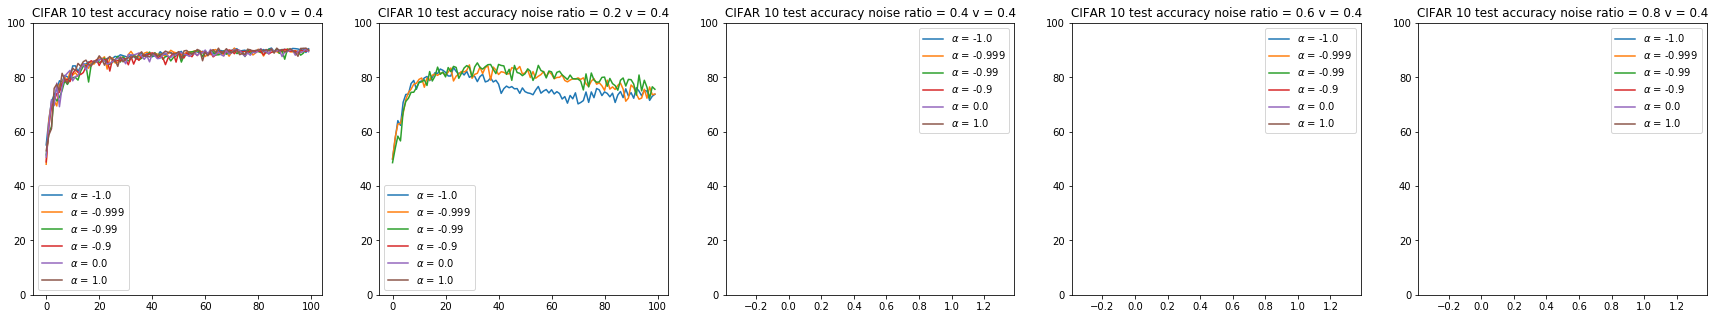

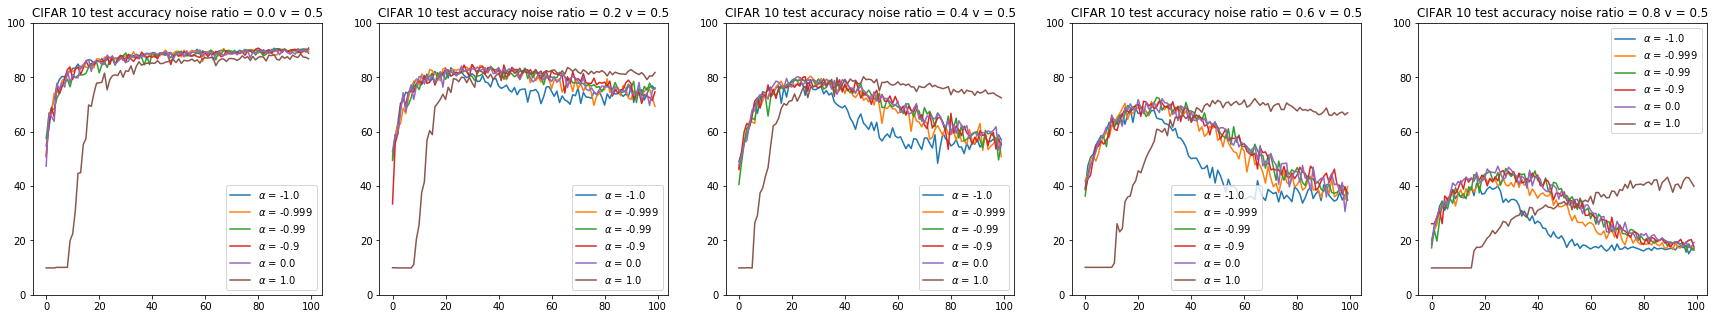

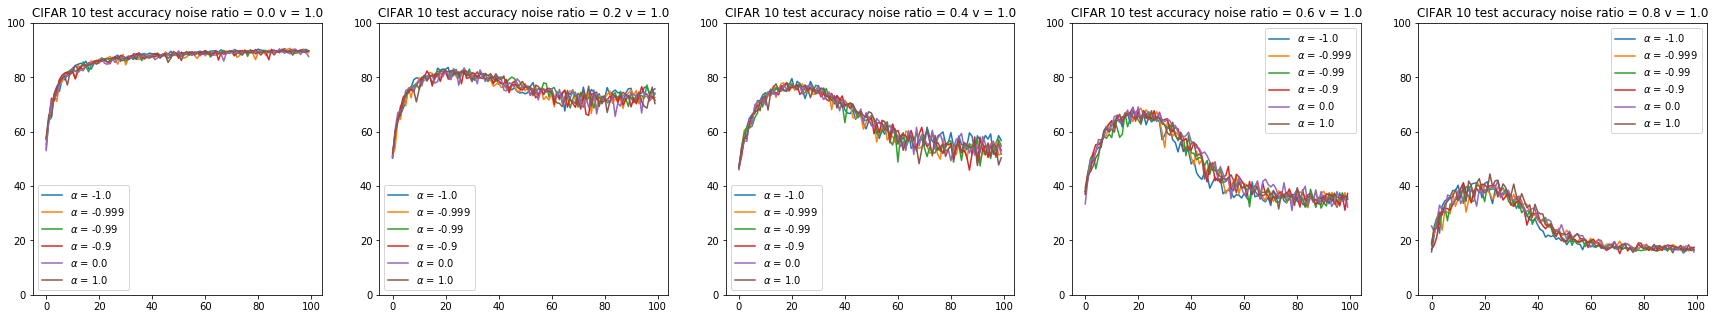

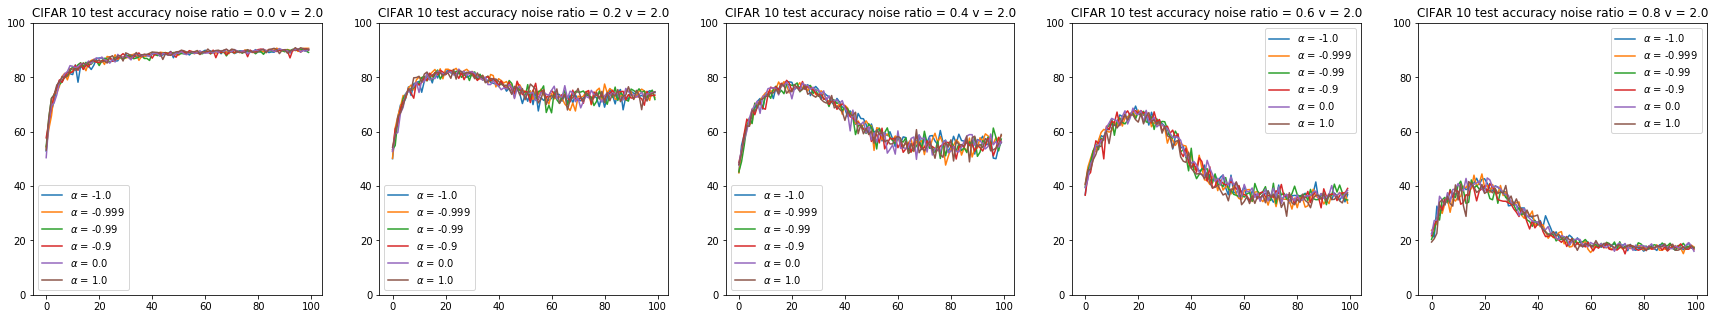

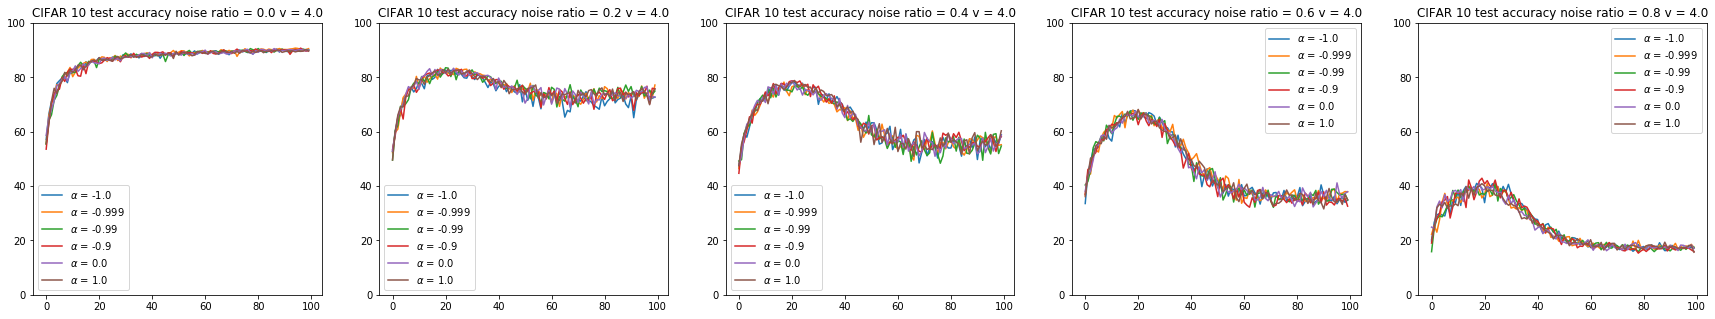

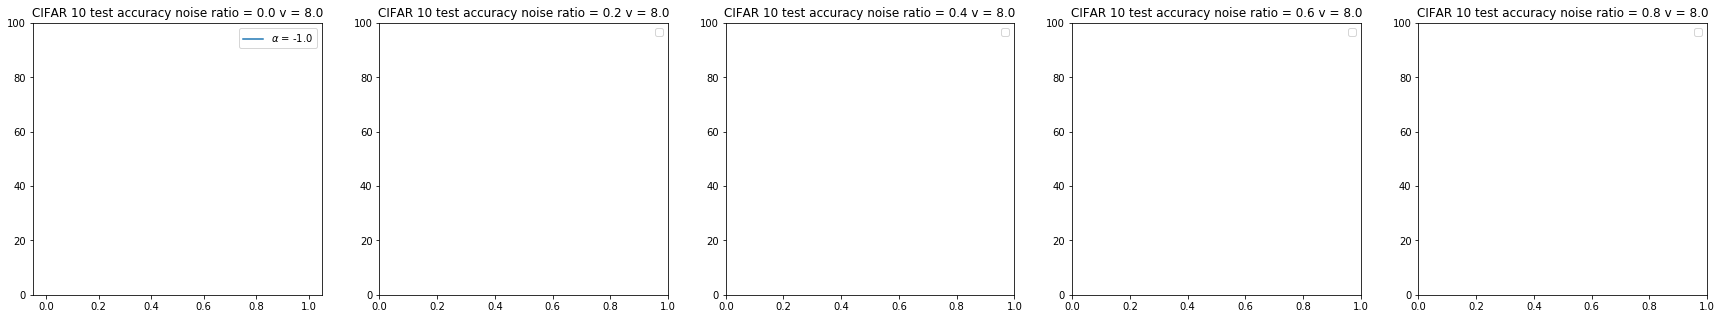

In [33]:
nr_list = sorted(list(sdf_cifar10['noise_ratio'].unique()))
v_list = sorted(list(sdf_cifar10['v'].unique()))
for v in v_list:
    fig, ax = plt.subplots(1, len(nr_list), figsize=(30, 5))
    for i, nr in enumerate(nr_list):
        plot_along_epoch(case_dict_cifar10, col_of_interests=['test_acc'], key_var='alpha', key_var_name=r'$\alpha$', case_meta_filter=lambda x: (x['noise_ratio'] == nr and x['v'] == v), ax=ax[i])
        ax[i].set_title('CIFAR 10 test accuracy noise ratio = {} v = {}'.format(nr, v))
        ax[i].set_ylim([0, 100])
    fig.show()

In [14]:
case_dict_imdb = extract_log("IMDB", "LSTM", "final")

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


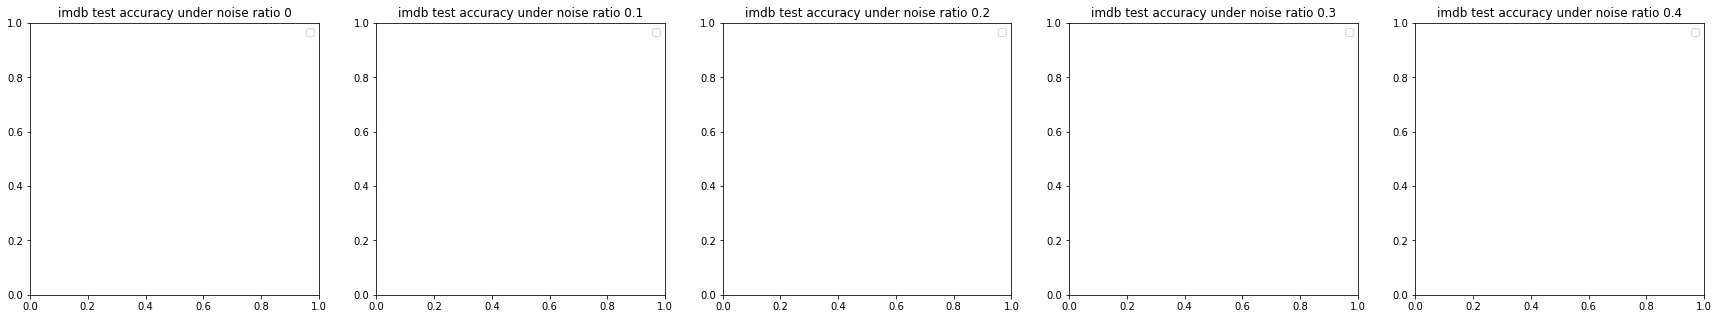

In [15]:
## investigate cases by label noise
fig, ax = plt.subplots(1, 5, figsize=(30, 5))
for i, nr in enumerate([0, 0.1, 0.2, 0.3, 0.4]):
    plot_along_epoch(case_dict_imdb, col_of_interests=['test_acc'], case_meta_filter=lambda x: x['noise_ratio'] == nr, ax=ax[i])
    ax[i].set_title('imdb test accuracy under noise ratio {}'.format(nr))

# MNIST

In [6]:
case_dict_mnist = extract_log("MNIST", "DNN", "more_about_v_alpha")

In [7]:
sdf_mnist = get_stats_df(case_dict_mnist)
sdf_mnist

key dataset model  \
0    MNISTmore_about_v_alphaDNN191230222630710   MNIST   DNN   
1    MNISTmore_about_v_alphaDNN191230222637619   MNIST   DNN   
2    MNISTmore_about_v_alphaDNN191230222643651   MNIST   DNN   
3   MNISTmore_about_v_alphaDNN1912302226491468   MNIST   DNN   
4   MNISTmore_about_v_alphaDNN1912302226543212   MNIST   DNN   
..                                         ...     ...   ...   
95   MNISTmore_about_v_alphaDNN191231035723392   MNIST   DNN   
96  MNISTmore_about_v_alphaDNN1912310357233523   MNIST   DNN   
97  MNISTmore_about_v_alphaDNN1912310400418263   MNIST   DNN   
98  MNISTmore_about_v_alphaDNN1912310403024027   MNIST   DNN   
99  MNISTmore_about_v_alphaDNN1912310404103550   MNIST   DNN   

               task_id cuda  eps      lr    v batch_size num_epochs  \
0   more_about_v_alpha    1  1.9  0.0001  0.5        128        100   
1   more_about_v_alpha    2  1.9  0.0001  1.0        128        100   
2   more_about_v_alpha    3  1.9  0.0001  2.0        128        100   
3   more_about_v_alpha    4  1.9  0.0001  4.0        128        100   
4   more_about_v_alpha    5  1.9  0.0001  8.0        128        100   
..                 ...  ...  ...     ...  ...        ...        ...   
95  more_about_v_alpha    5  1.9  0.0001  8.0        128        100   
96  more_about_v_alpha    4  1.9  0.0001  4.0        128        100   
97  more_about_v_alpha    3  1.9  0.0001  2.0        128        100   
98  more_about_v_alpha    2  1.9  0.0001  1.0        128        100   
99  more_about_v_alpha    1  1.9  0.0001  0.5        128        100   

    noise_ratio  alpha  auto  
0           0.0    0.1  True  
1           0.0    0.1  True  
2           0.0    0.1  True  
3           0.0    0.1  True  
4           0.0    0.1  True  
..          ...    ...   ...  
95          0.8    1.5  True  
96          0.8    1.5  True  
97          0.8    1.5  True  
98          0.8    1.5  True  
99          0.8    1.5  True  

[100 rows x 13 columns]

In [8]:
list(sdf_mnist['alpha'].unique())

[0.1, 0.3, 1.0, 1.5]

C:\Users\wangz\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


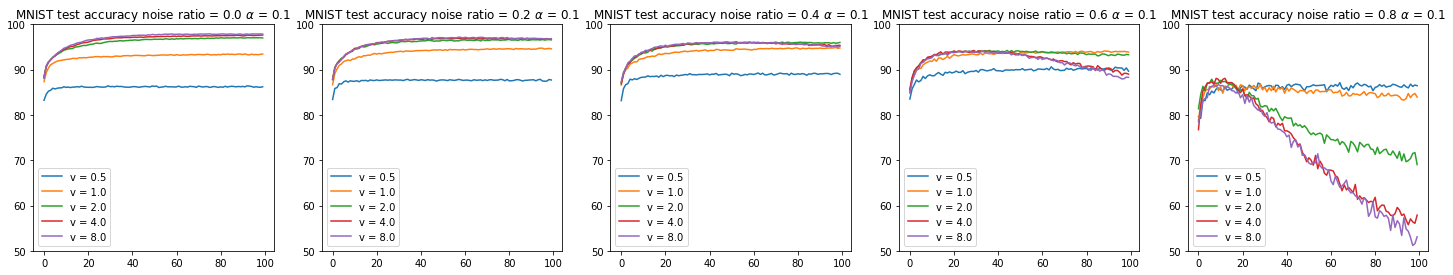

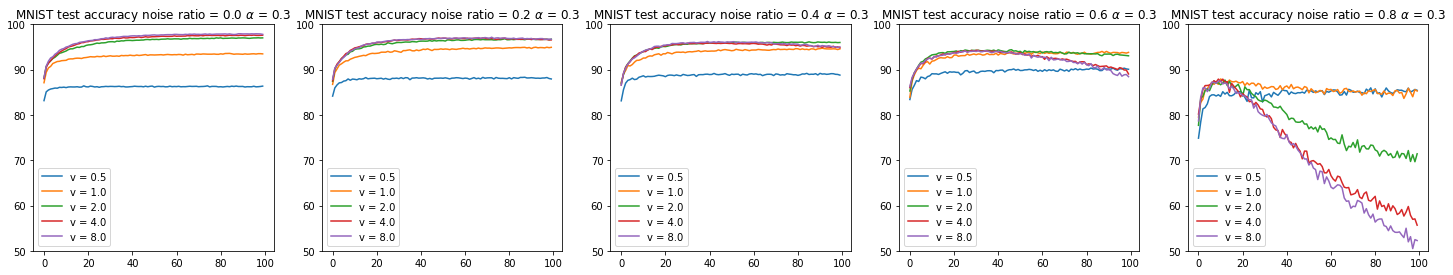

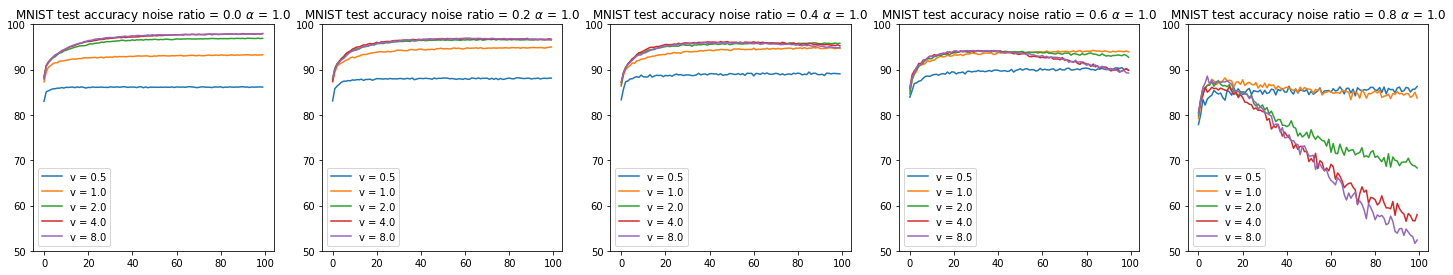

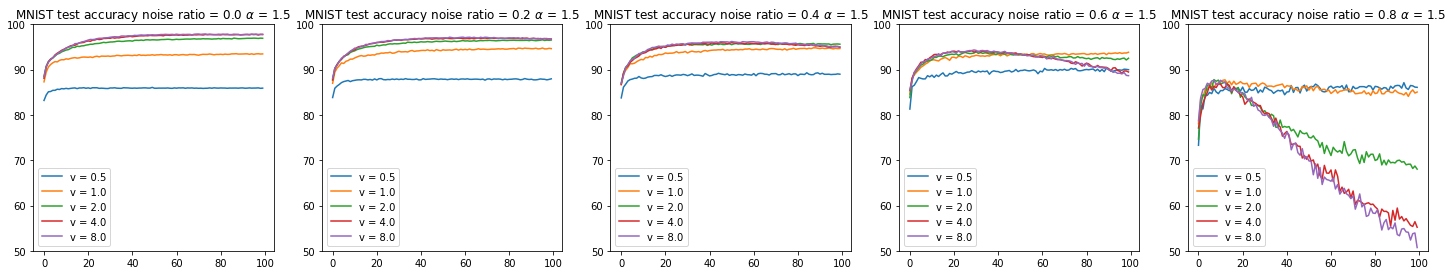

In [10]:
## investigate cases by label noise
nr_list = list(sdf_mnist['noise_ratio'].unique())
alpha_list = list(sdf_mnist['alpha'].unique())
for alpha in alpha_list:
    fig, ax = plt.subplots(1, len(nr_list), figsize=(30/1.2, 5/1.2))
    for i, nr in enumerate(nr_list):
        plot_along_epoch(case_dict_mnist, col_of_interests=['test_acc'], case_meta_filter=lambda x: (x['noise_ratio'] == nr and x['alpha'] == alpha), ax=ax[i])
        ax[i].set_title(r'MNIST test accuracy noise ratio = {} $\alpha$ = {}'.format(nr, alpha))
        ax[i].set_ylim([50, 100])
    fig.show()

C:\Users\wangz\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


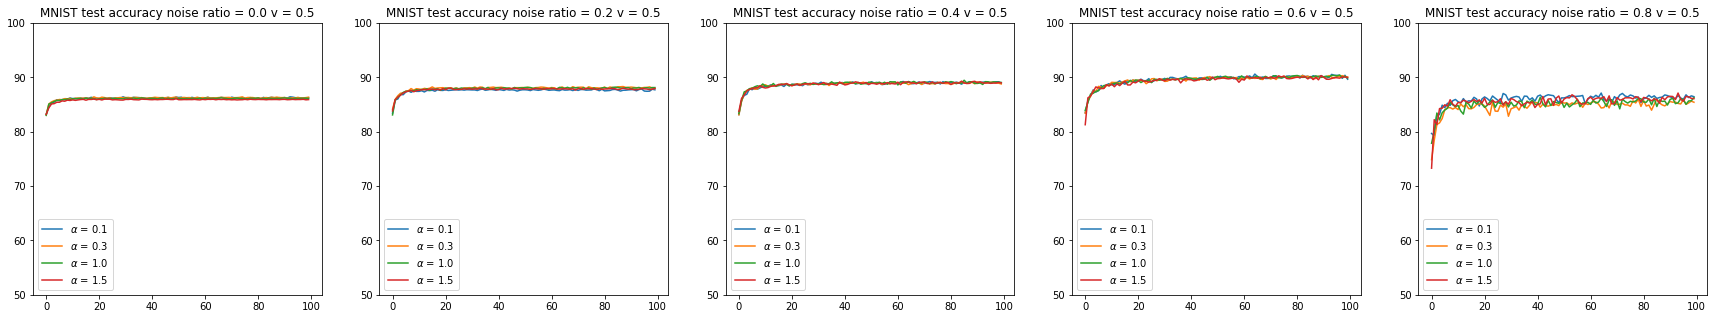

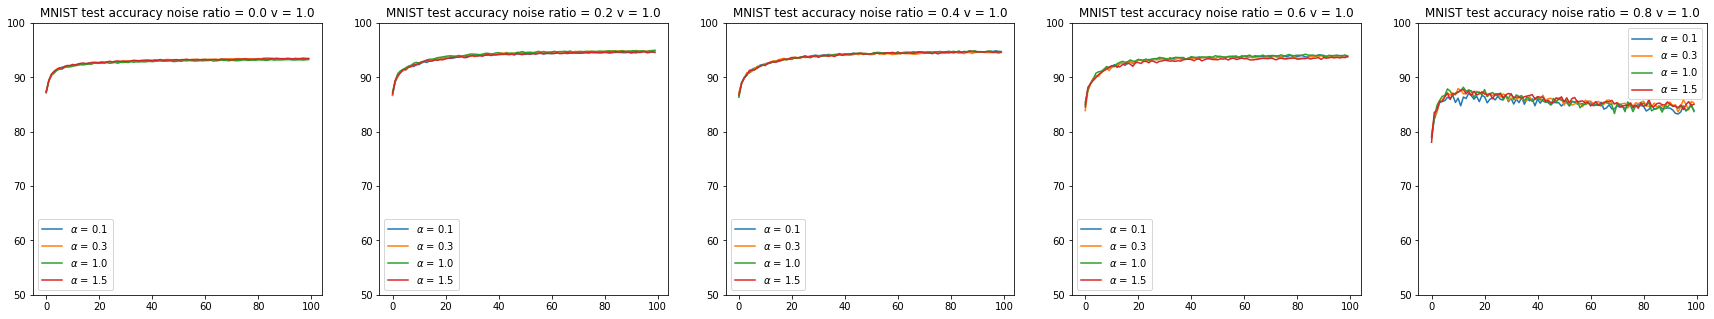

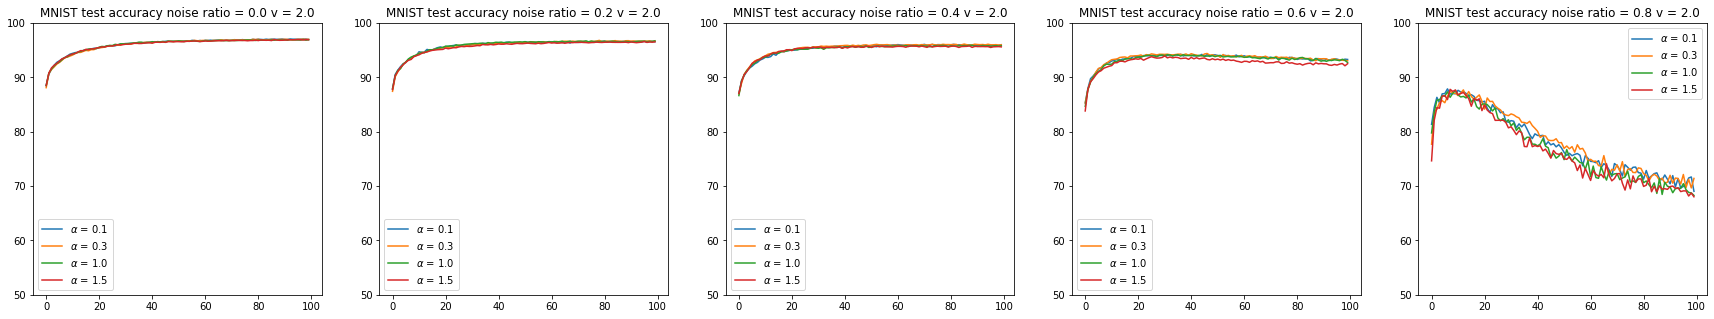

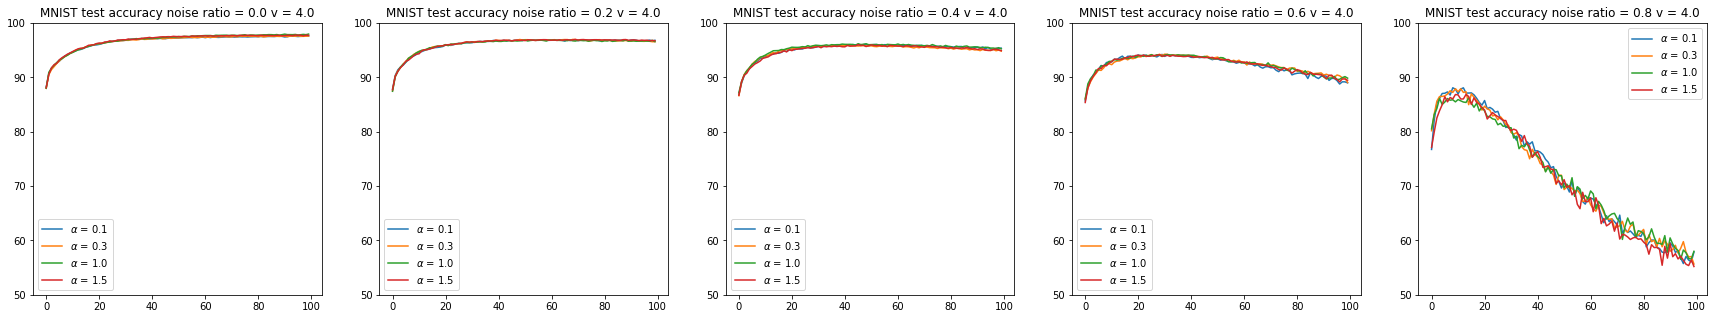

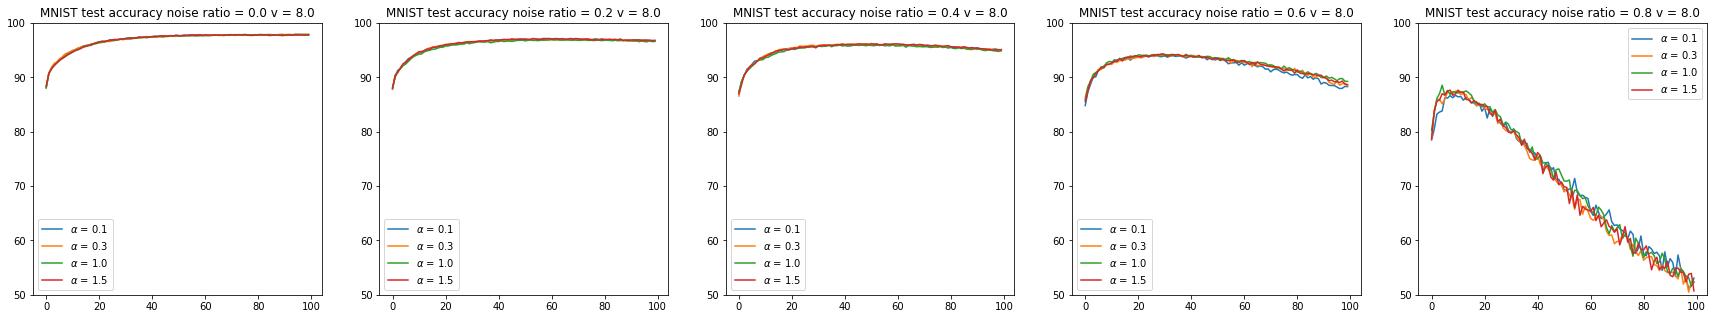

In [131]:
nr_list = list(sdf_mnist['noise_ratio'].unique())
v_list = list(sdf_mnist['v'].unique())
for v in v_list:
    fig, ax = plt.subplots(1, len(nr_list), figsize=(30, 5))
    for i, nr in enumerate(nr_list):
        plot_along_epoch(case_dict_cifar10, col_of_interests=['test_acc'], key_var='alpha', key_var_name=r'$\alpha$', case_meta_filter=lambda x: (x['noise_ratio'] == nr and x['v'] == v), ax=ax[i])
        ax[i].set_title('MNIST test accuracy noise ratio = {} v = {}'.format(nr, v))
        ax[i].set_ylim([50, 100])
    fig.show()

In [141]:
case_dict_mnist2 = extract_log("MNIST", "DNN", "negative_alpha")
sdf_mnist2 = get_stats_df(case_dict_mnist2)

C:\Users\wangz\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


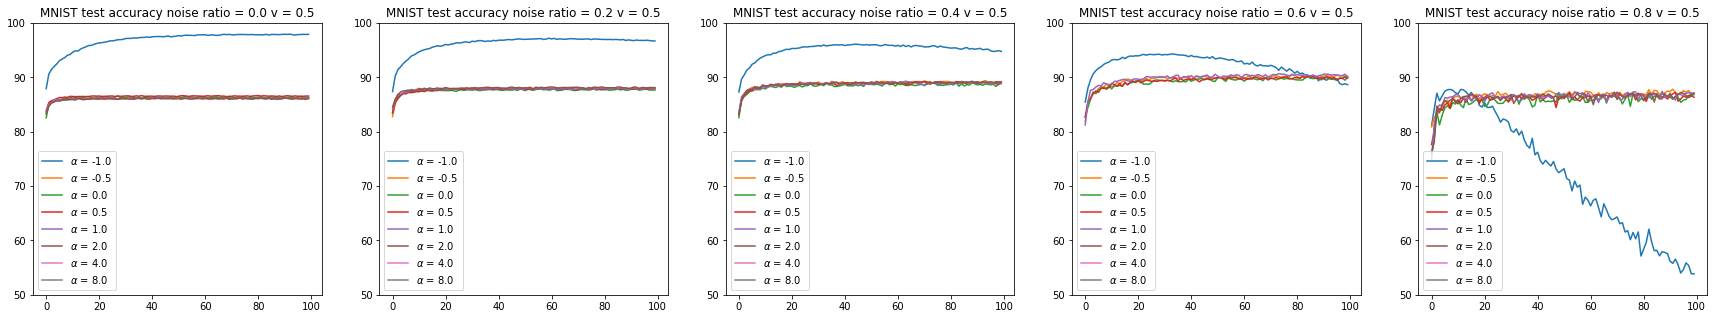

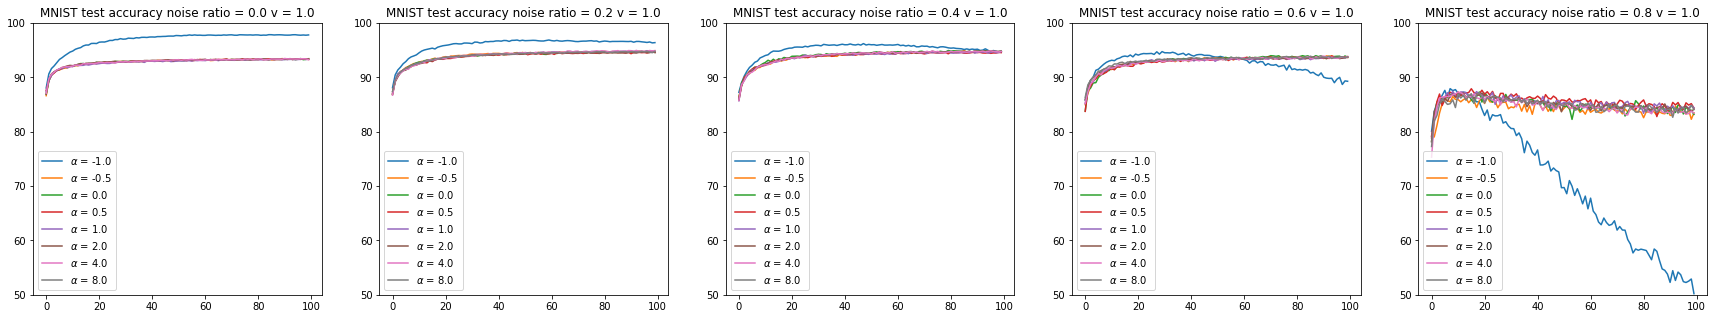

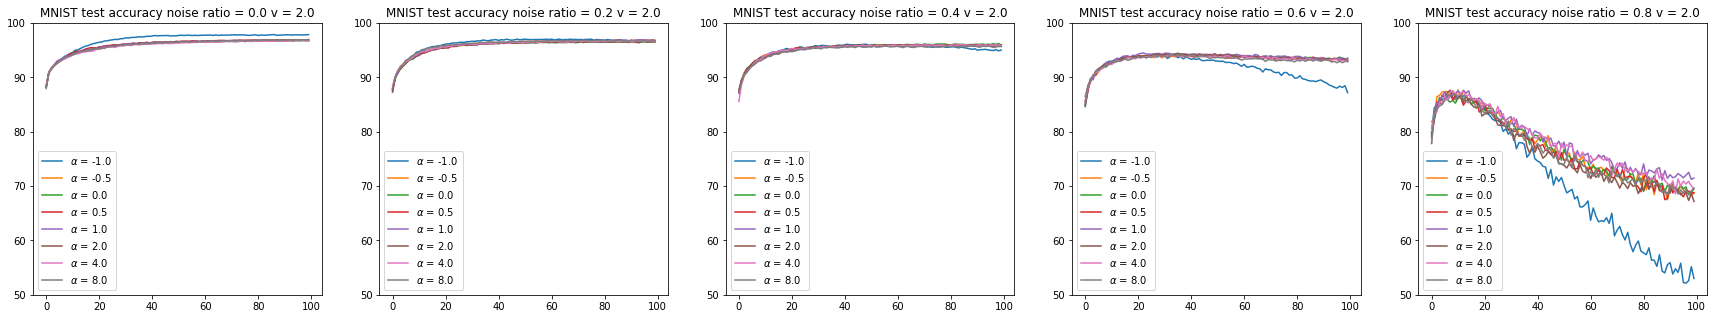

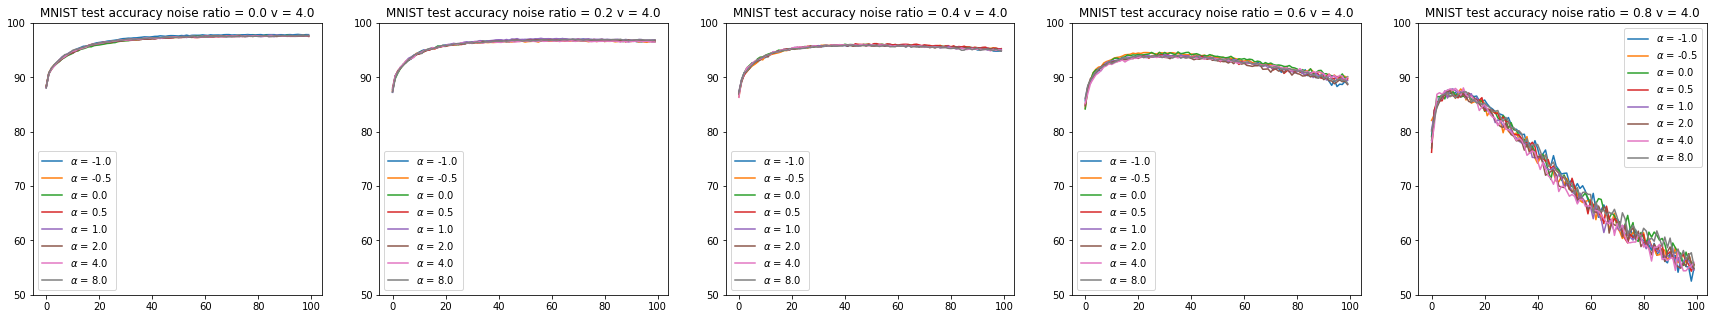

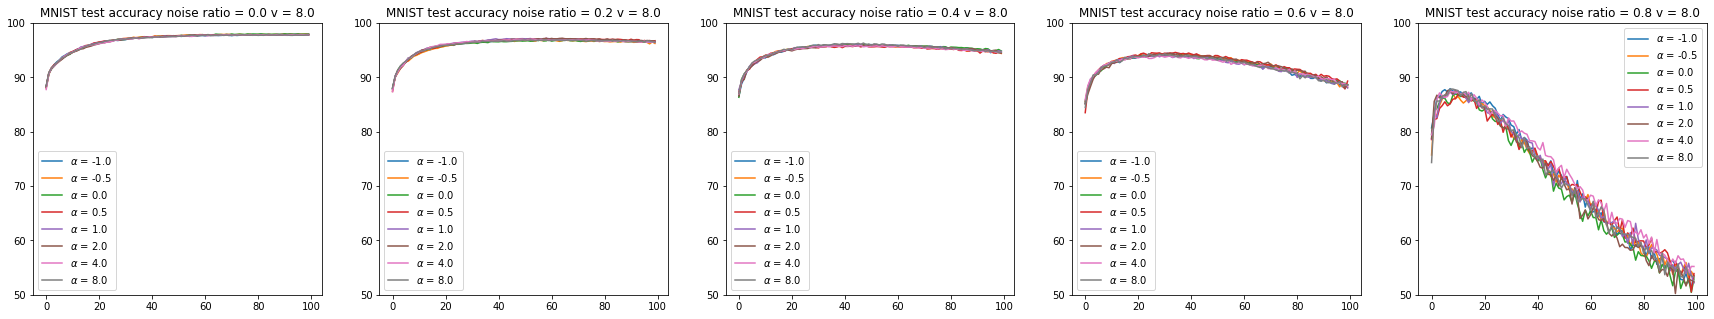

In [134]:
nr_list = list(sdf_mnist2['noise_ratio'].unique())
v_list = list(sdf_mnist2['v'].unique())
for v in v_list:
    fig, ax = plt.subplots(1, len(nr_list), figsize=(30, 5))
    for i, nr in enumerate(nr_list):
        plot_along_epoch(case_dict_mnist2,
                         col_of_interests=['test_acc'], 
                         key_var='alpha',
                         key_var_name=r'$\alpha$',
                         key_var_filter=lambda x: x>=-1 and x<=8,
                         case_meta_filter=lambda x: (x['noise_ratio'] == nr and x['v'] == v), ax=ax[i])
        ax[i].set_title('MNIST test accuracy noise ratio = {} v = {}'.format(nr, v))
        ax[i].set_ylim([50, 100])
    fig.show()

[-8.0, -4.0, -2.0, -1.0, -0.5, 0.0, 0.5, 1.0, 2.0, 4.0, 8.0]


C:\Users\wangz\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


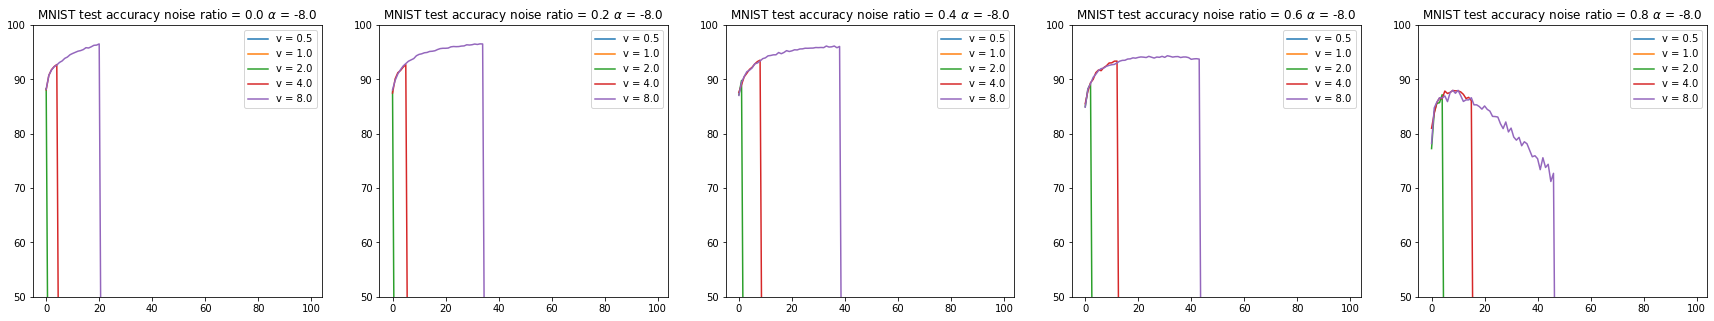

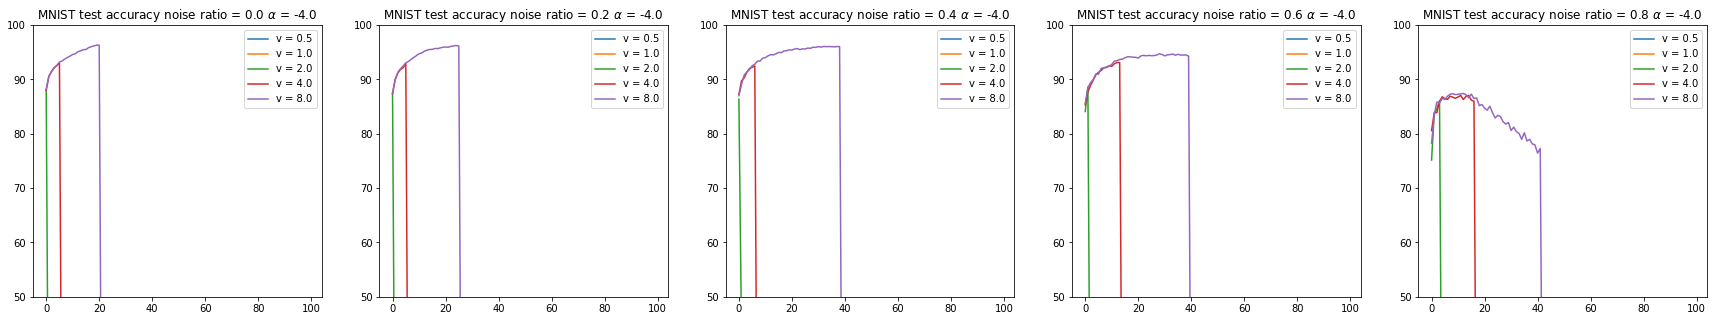

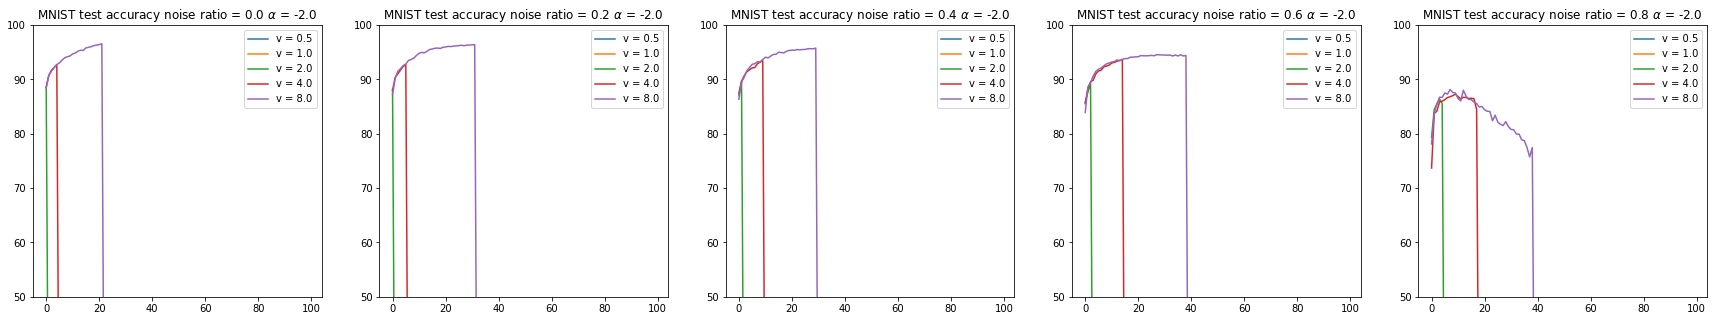

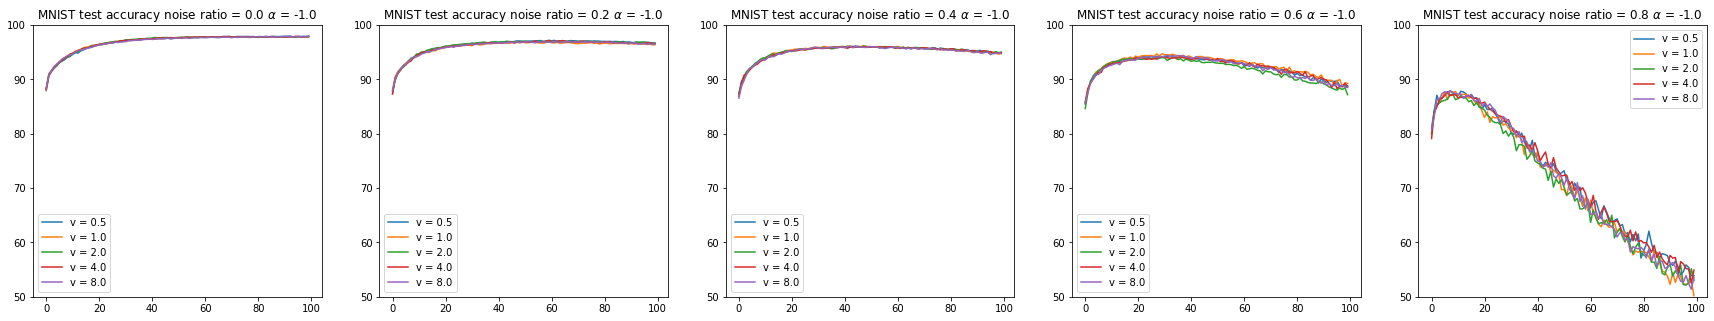

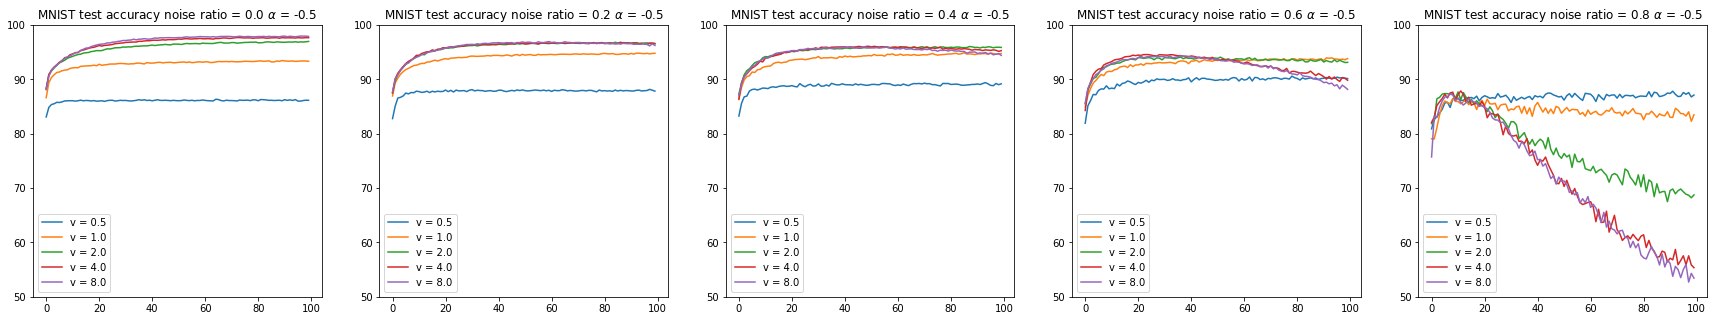

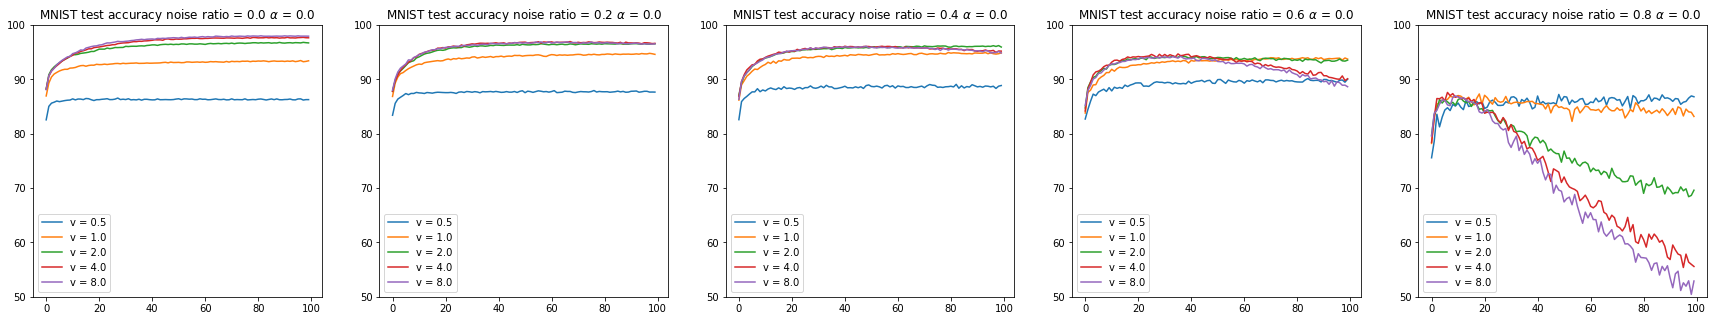

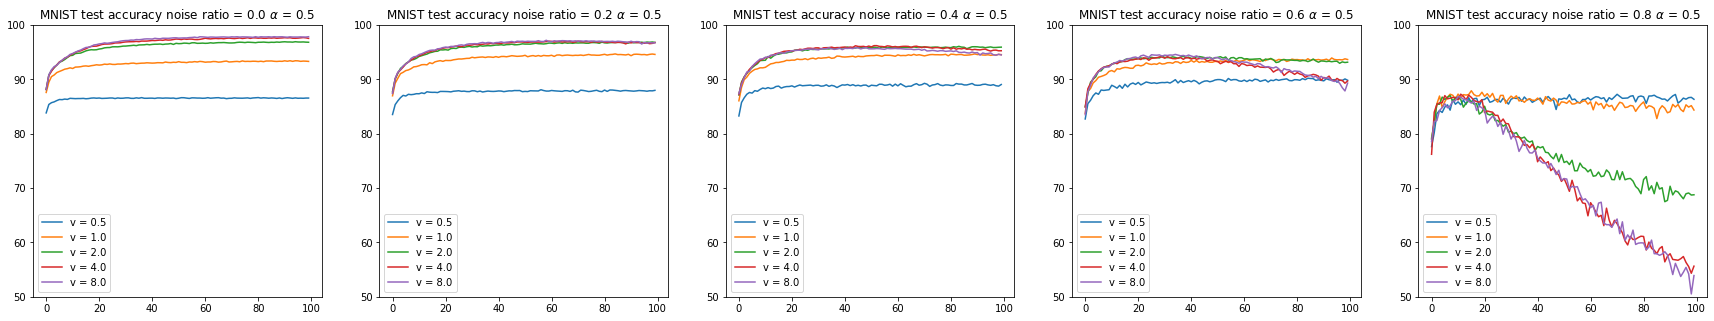

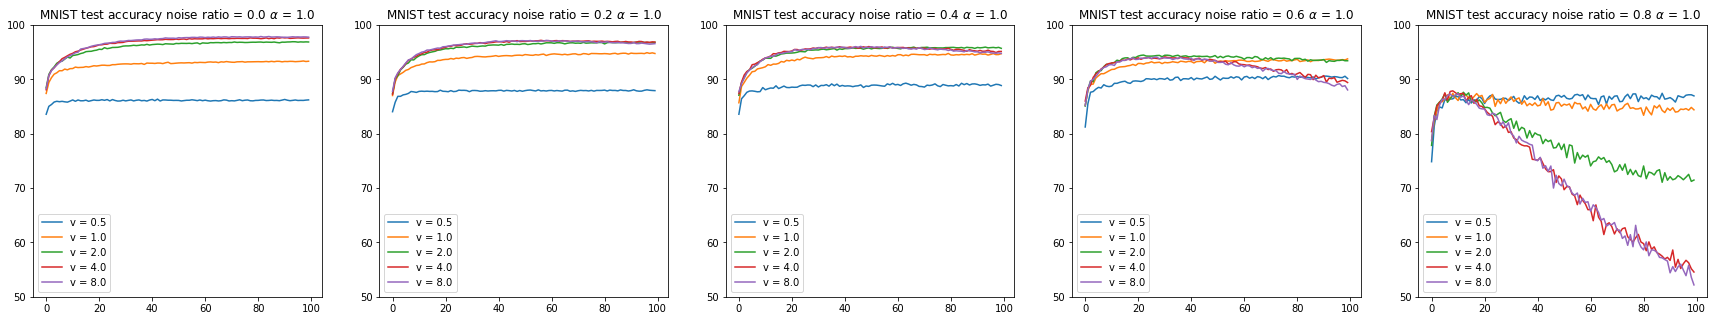

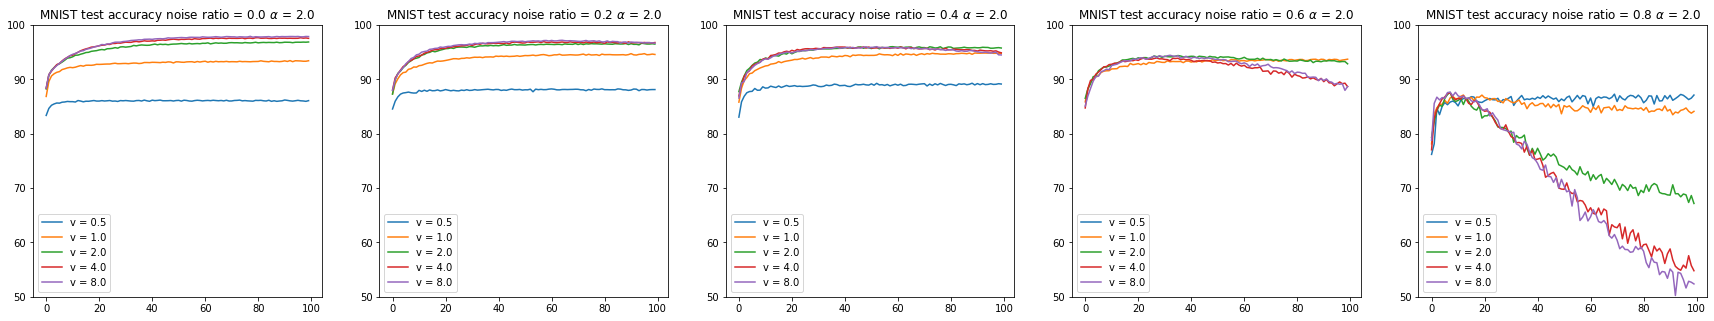

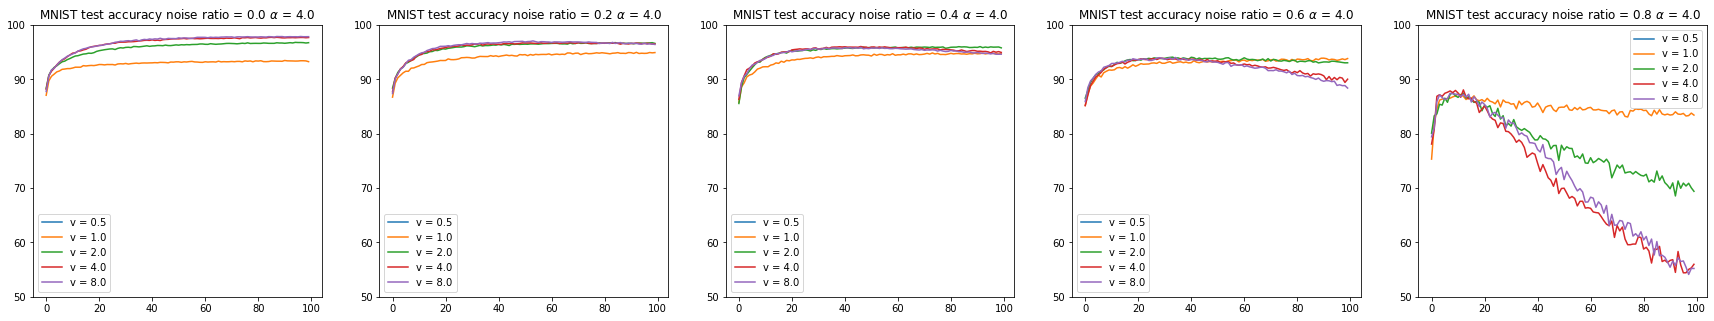

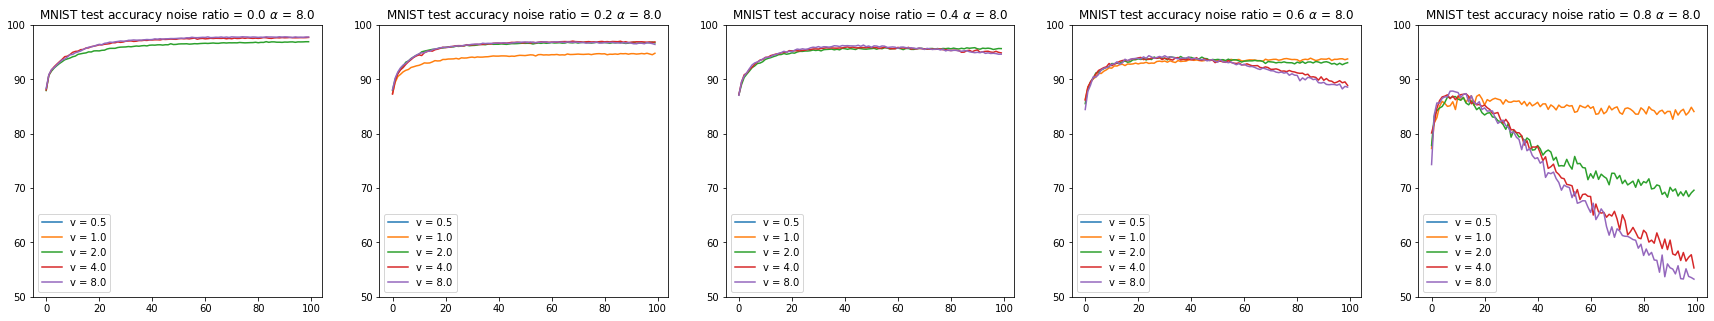

In [142]:
nr_list = list(sdf_mnist2['noise_ratio'].unique())
alpha_list = list(sdf_mnist2['alpha'].unique())
print(alpha_list)
for alpha in alpha_list:
    fig, ax = plt.subplots(1, len(nr_list), figsize=(30, 5))
    for i, nr in enumerate(nr_list):
        plot_along_epoch(case_dict_mnist2,
                         col_of_interests=['test_acc'],
                         key_var='v',
                         key_var_name='v',
                         key_var_filter=lambda x: x>=-1 and x<=8,
                         case_meta_filter=lambda x: (x['noise_ratio'] == nr and x['alpha'] == alpha), ax=ax[i])
        ax[i].set_title(r'MNIST test accuracy noise ratio = {} $\alpha$ = {}'.format(nr, alpha))
        ax[i].set_ylim([50, 100])
    fig.show()

In [35]:
case_dict_mnist3 = extract_log("MNIST", "DNN", "clarify_v_alpha")
sdf_mnist3 = get_stats_df(case_dict_mnist3)
sdf_mnist3

key dataset model          task_id  \
0    MNISTclarify_v_alphaDNN2001071044268557   MNIST   DNN  clarify_v_alpha   
1        MNISTclarify_v_alphaDNN191229020334   MNIST   DNN  clarify_v_alpha   
2        MNISTclarify_v_alphaDNN191229023632   MNIST   DNN  clarify_v_alpha   
3        MNISTclarify_v_alphaDNN191229025021   MNIST   DNN  clarify_v_alpha   
4    MNISTclarify_v_alphaDNN2001070556432594   MNIST   DNN  clarify_v_alpha   
..                                       ...     ...   ...              ...   
359  MNISTclarify_v_alphaDNN2001070446557436   MNIST   DNN  clarify_v_alpha   
360      MNISTclarify_v_alphaDNN191229025258   MNIST   DNN  clarify_v_alpha   
361  MNISTclarify_v_alphaDNN2001071344351974   MNIST   DNN  clarify_v_alpha   
362   MNISTclarify_v_alphaDNN200107015625833   MNIST   DNN  clarify_v_alpha   
363   MNISTclarify_v_alphaDNN200107162922120   MNIST   DNN  clarify_v_alpha   

    cuda  eps      lr     v batch_size num_epochs  noise_ratio  alpha  auto  
0      4  1.9  0.0001  2.00        128        100          0.0 -0.900  True  
1      2  1.9  0.0001  0.75        128        100          0.2  0.100  True  
2      2  1.9  0.0001  0.75        128        100          0.2  1.000  True  
3      3  1.9  0.0001  1.00        128        100          0.2  1.000  True  
4      2  1.9  0.0001  1.00        128        100          0.6 -0.999  True  
..   ...  ...     ...   ...        ...        ...          ...    ...   ...  
359    1  1.9  0.0001  0.50        128        100          0.4  0.000  True  
360    2  1.9  0.0001  0.75        128        100          0.2  3.000  True  
361    2  1.9  0.0001  2.00        128        100          0.2  1.000  True  
362    5  1.9  0.0001  8.00        128        100          0.2 -1.000  True  
363    3  1.9  0.0001  0.00        128        100          0.6  1.000  True  

[364 rows x 13 columns]

/Users/zihao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


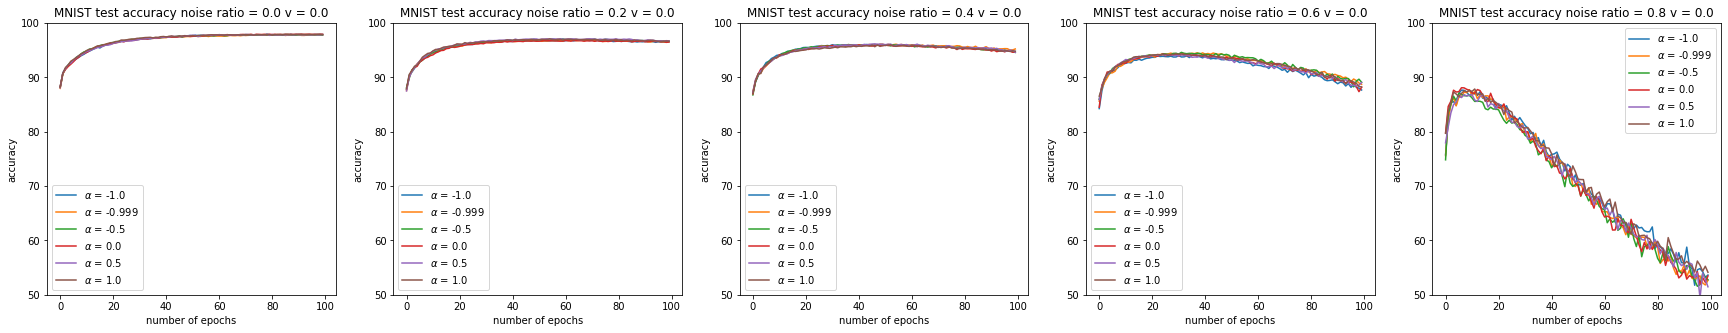

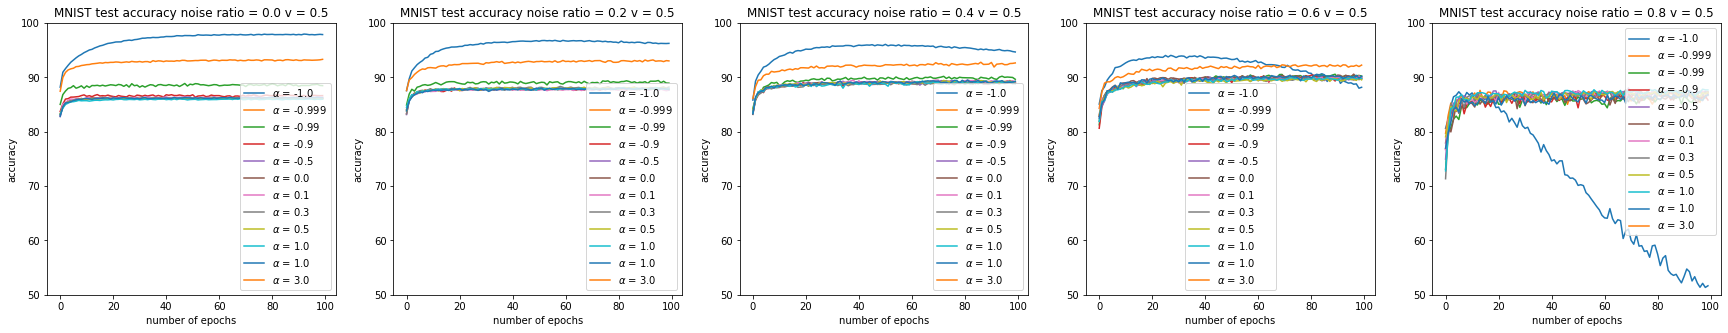

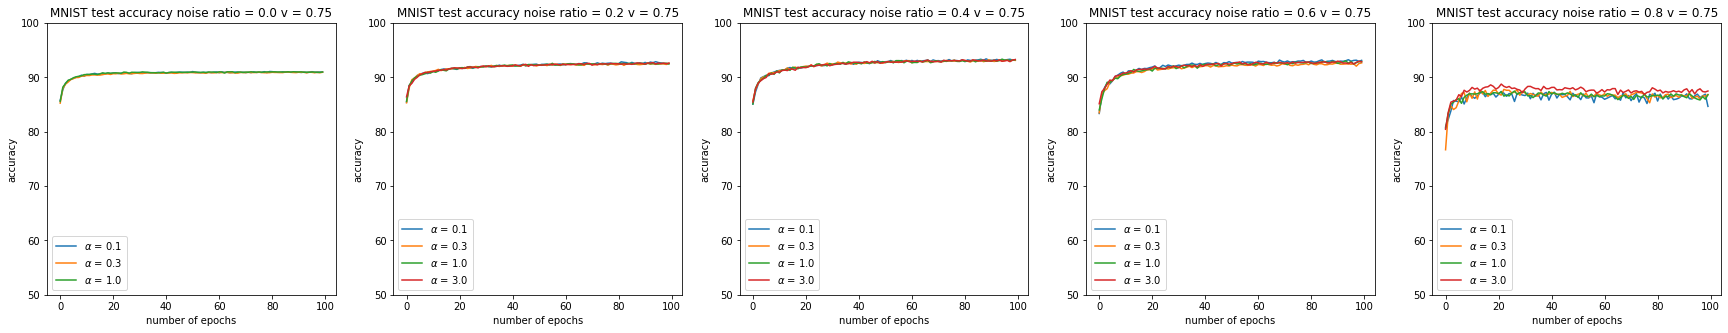

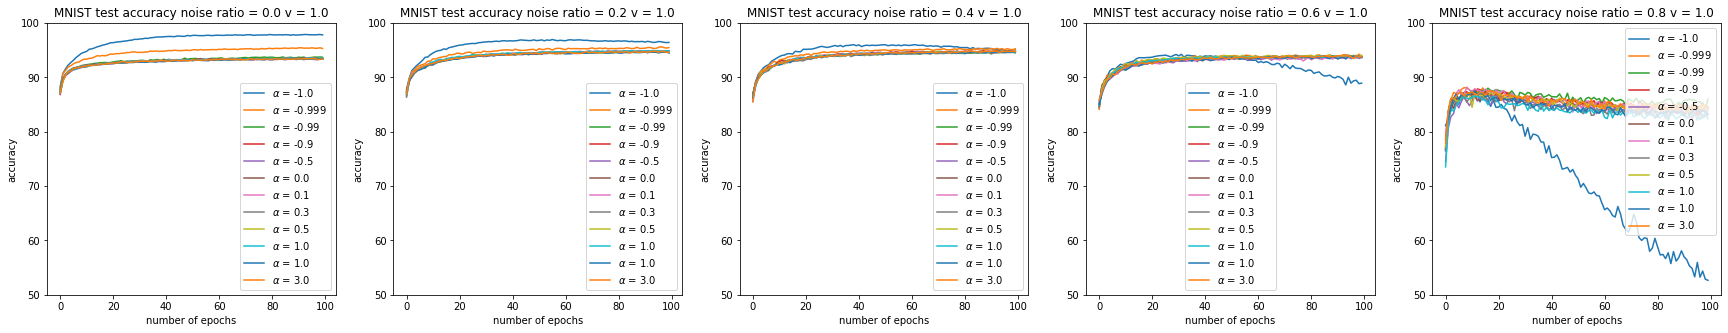

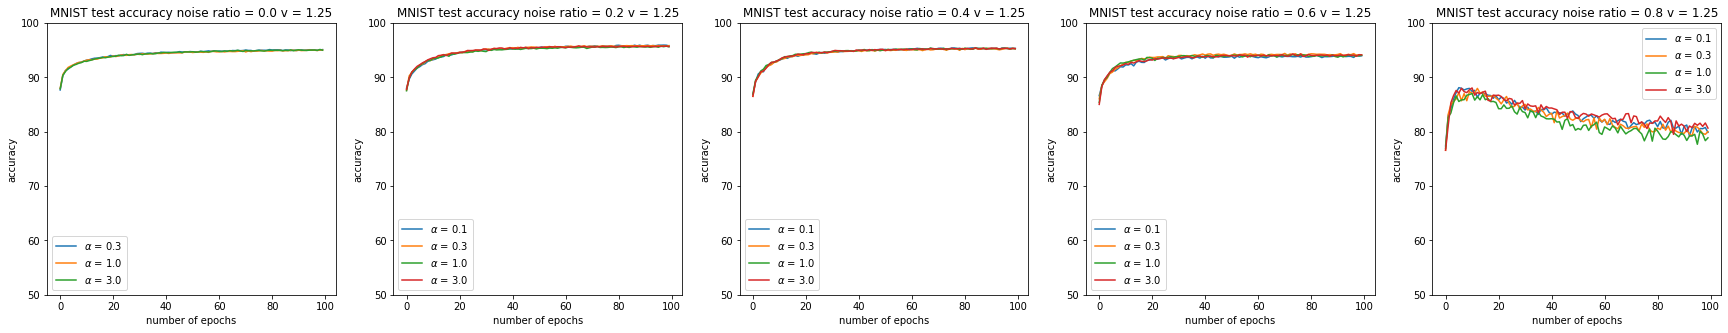

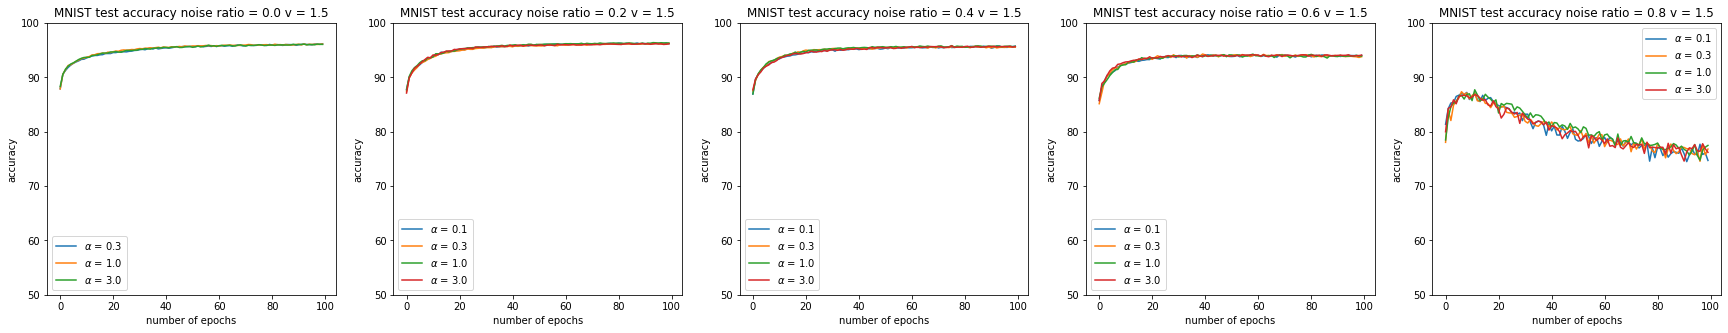

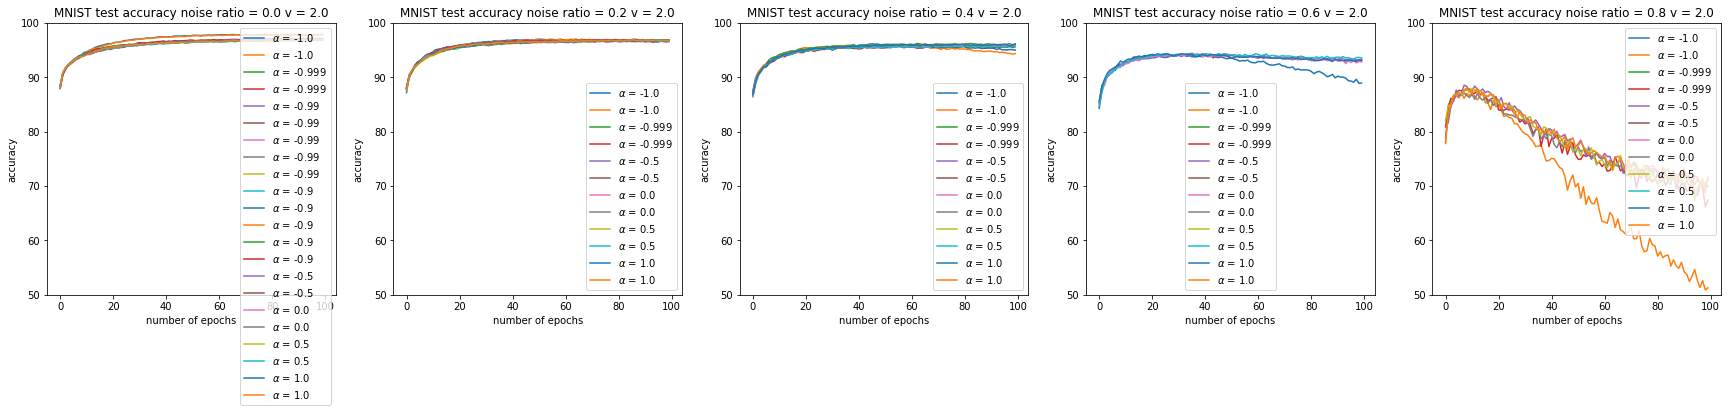

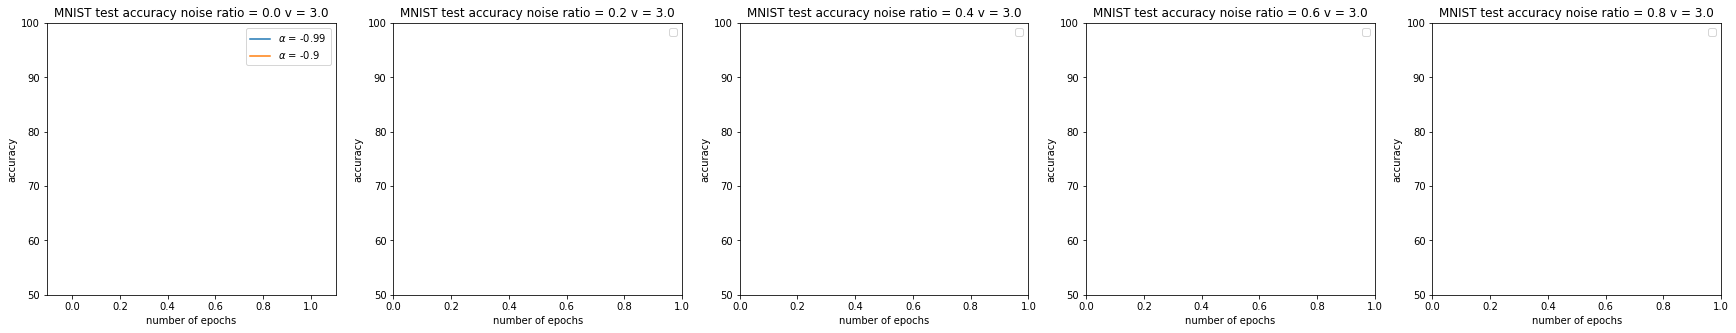

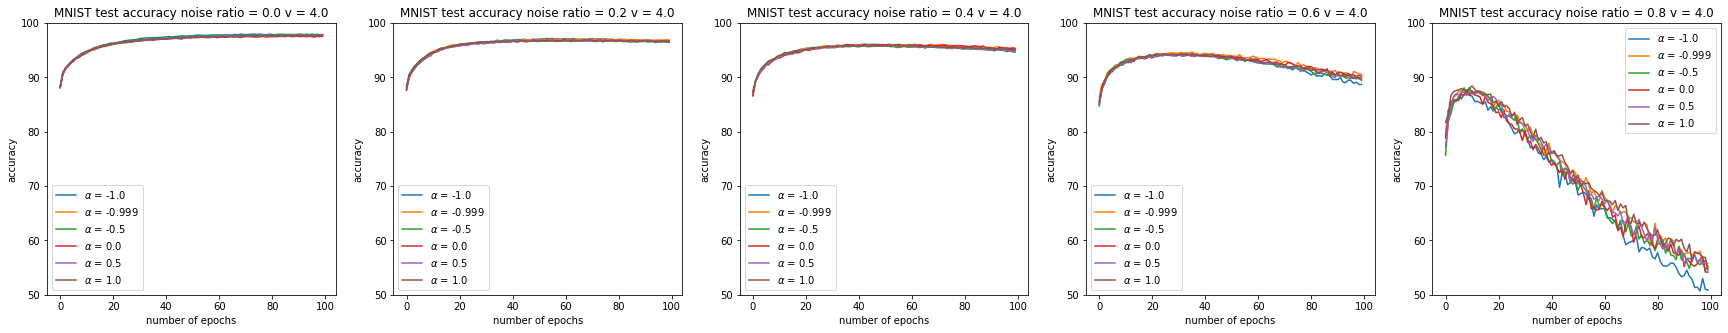

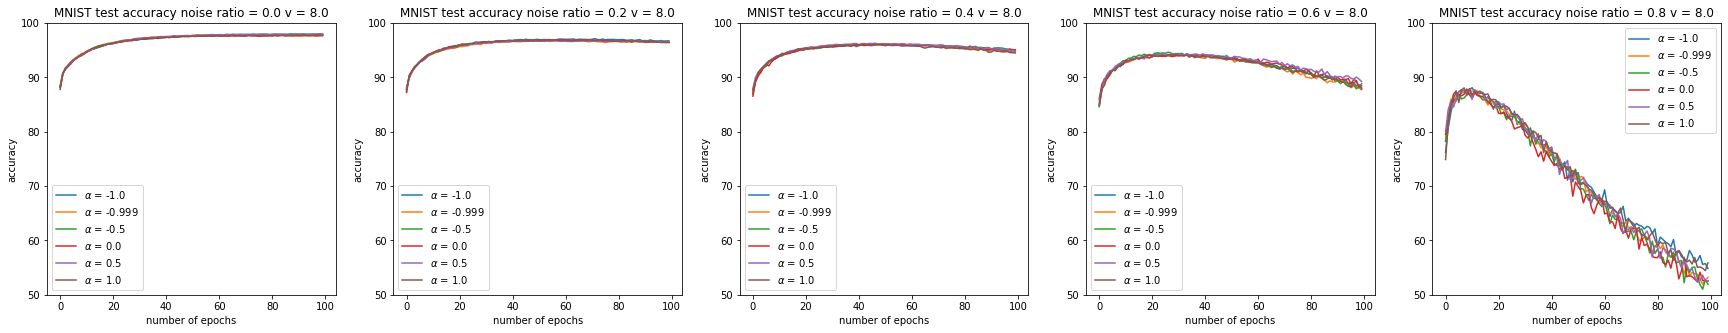

In [37]:

nr_list = sorted(list(sdf_mnist3['noise_ratio'].unique()))
v_list = sorted(list(sdf_mnist3['v'].unique()))
for v in v_list:
    fig, ax = plt.subplots(1, len(nr_list), figsize=(30, 5))
    for i, nr in enumerate(nr_list):
        plot_along_epoch(case_dict_mnist3,
                         col_of_interests=['test_acc'], 
                         key_var='alpha',
                         key_var_name=r'$\alpha$',
                         key_var_filter=lambda x: x>=-1 and x<=8,
                         case_meta_filter=lambda x: (x['noise_ratio'] == nr and x['v'] == v), ax=ax[i])
        ax[i].set_title('MNIST test accuracy noise ratio = {} v = {}'.format(nr, v))
        ax[i].set_ylim([50, 100])
        ax[i].set_xlabel('number of epochs')
        ax[i].set_ylabel('accuracy')
    fig.show()


[-1.0, -0.999, -0.99, -0.9, -0.5, 0.0, 0.1, 0.3, 0.5, 1.0, 3.0, 10.0]


/Users/zihao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


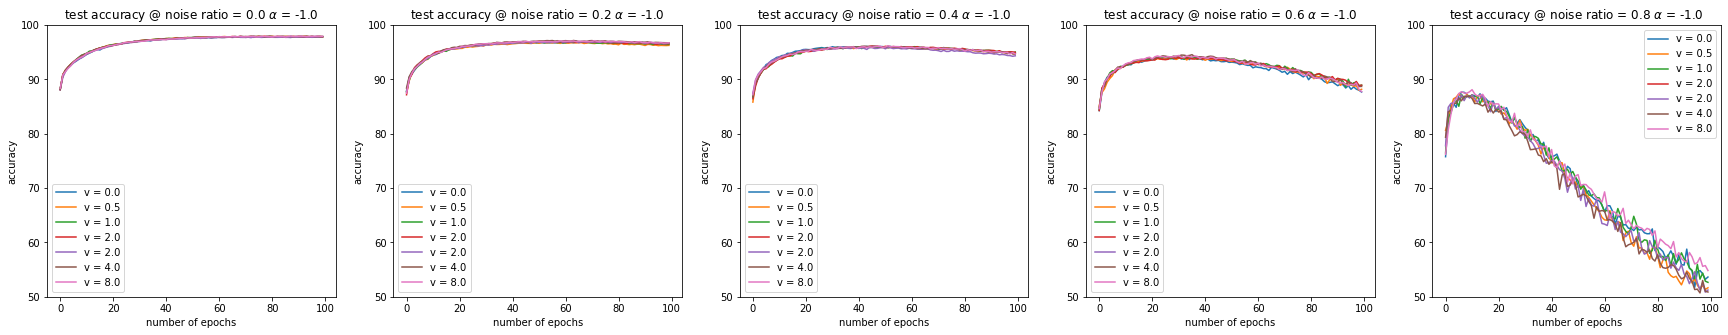

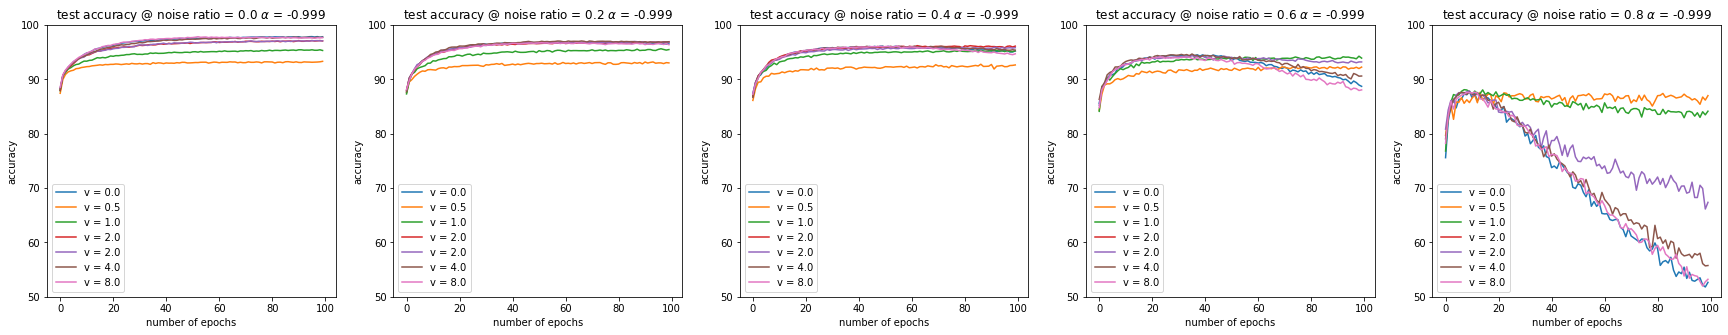

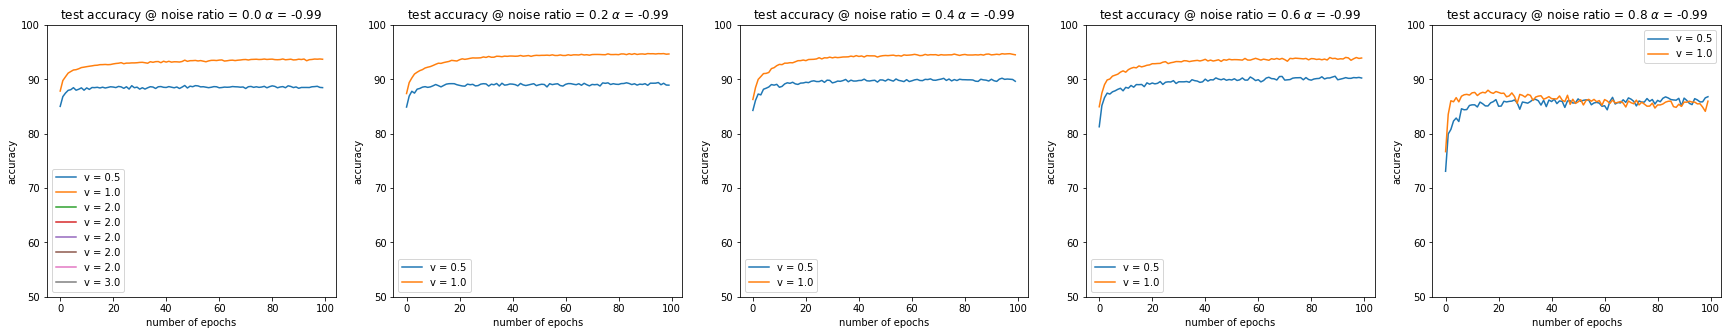

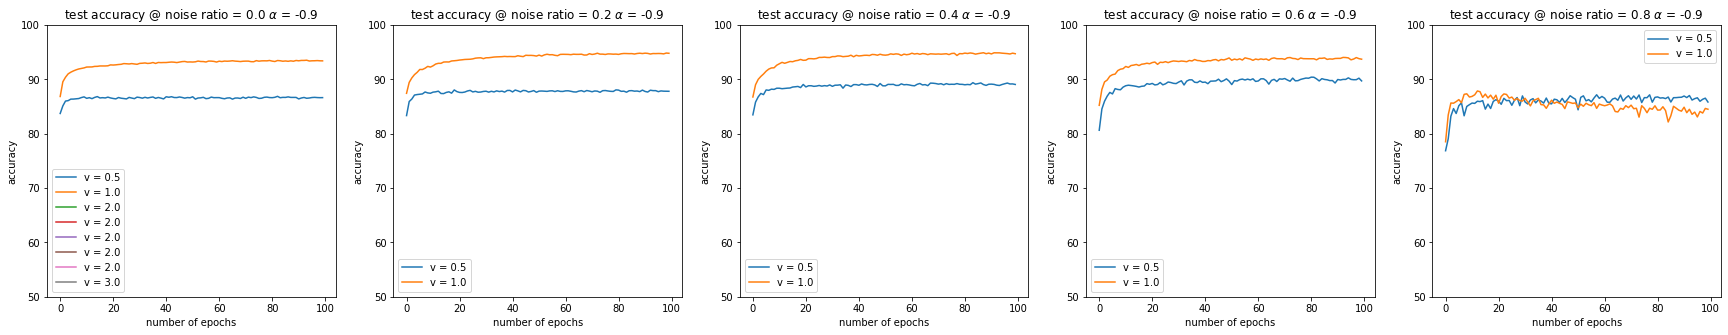

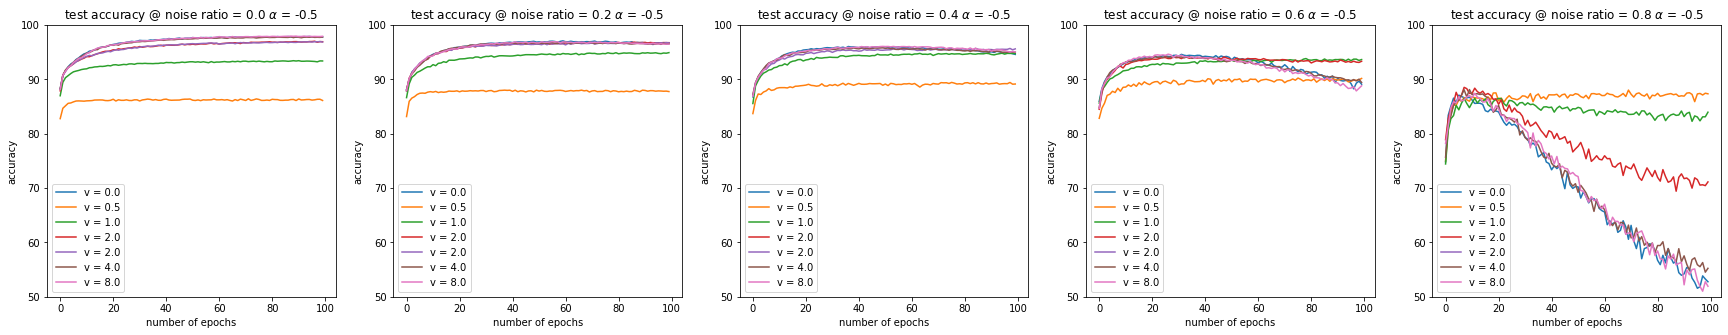

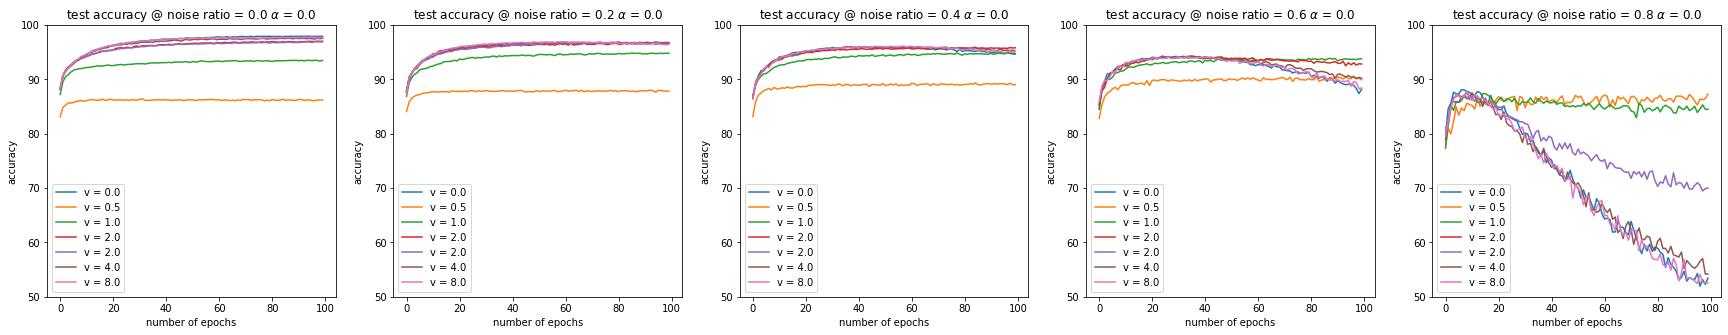

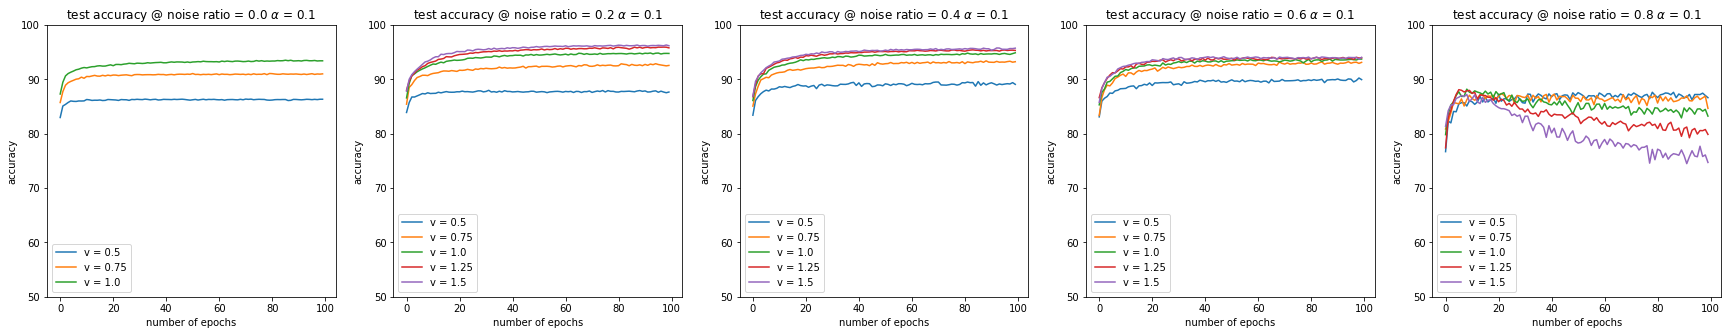

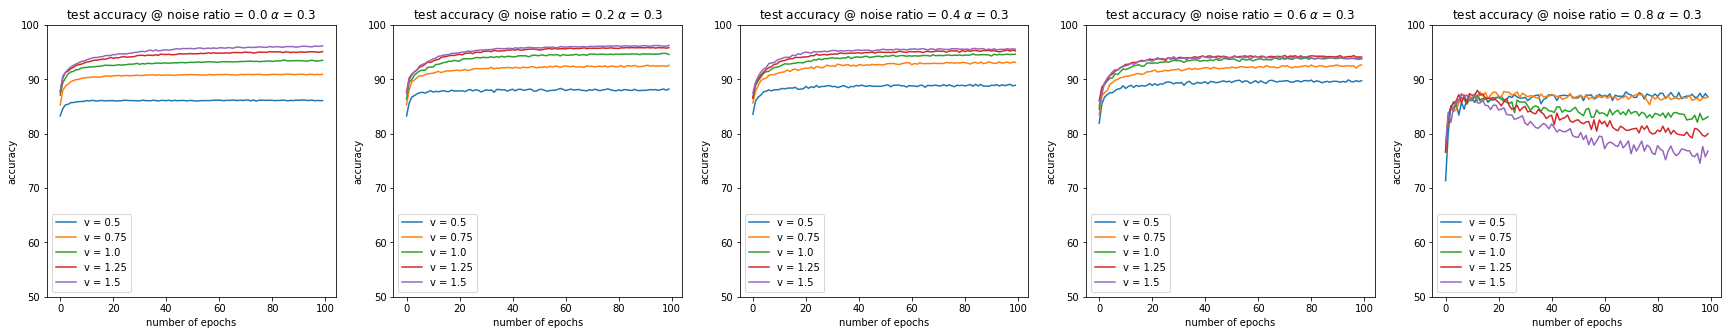

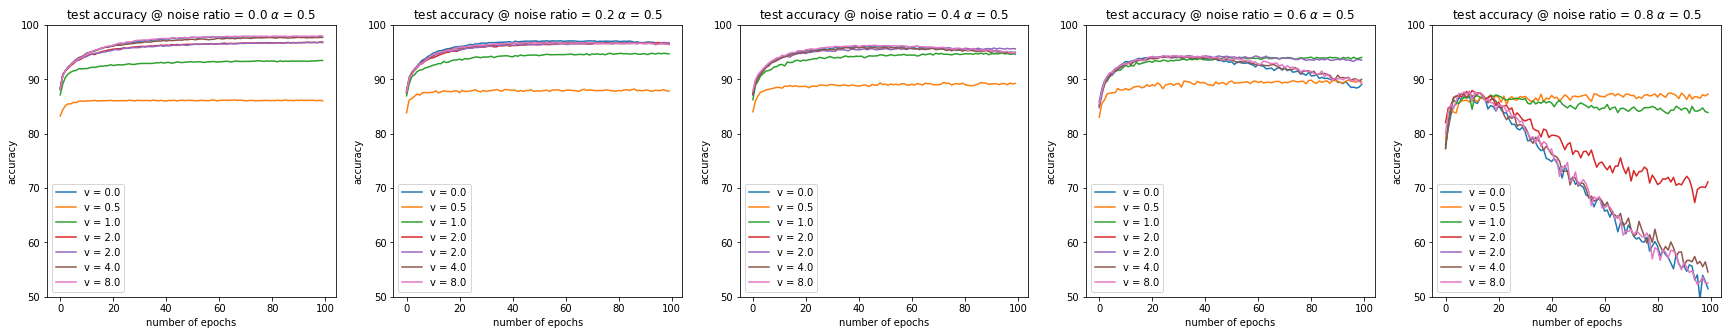

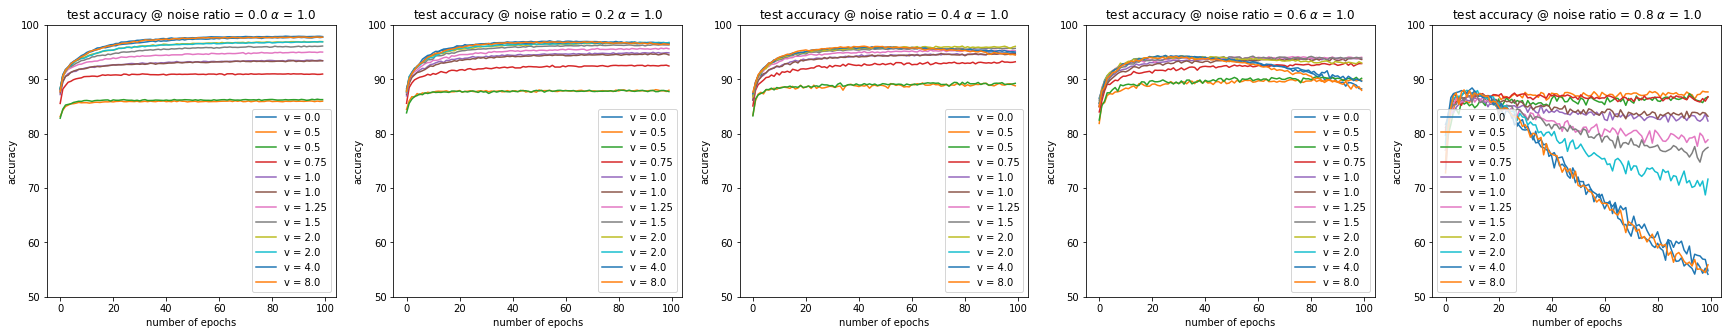

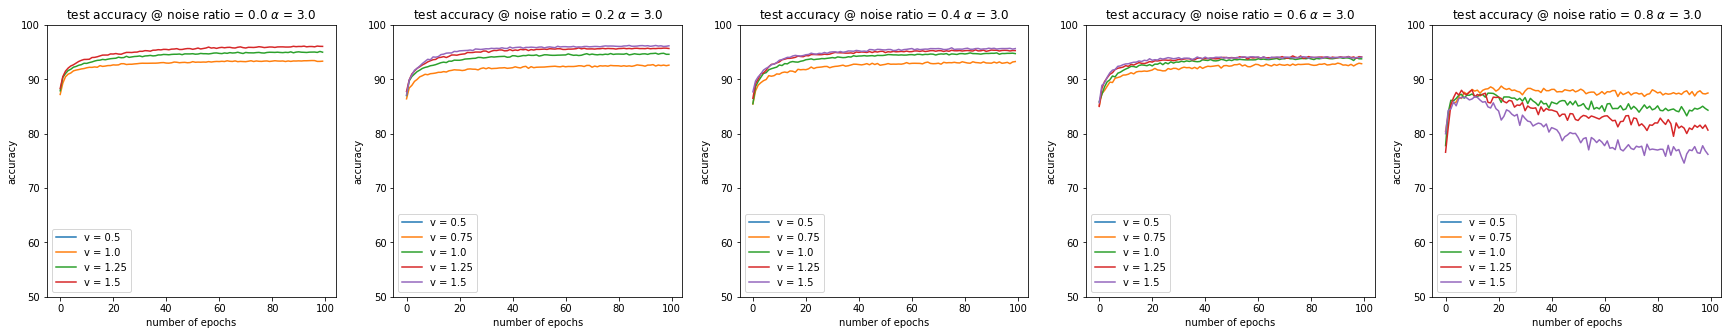

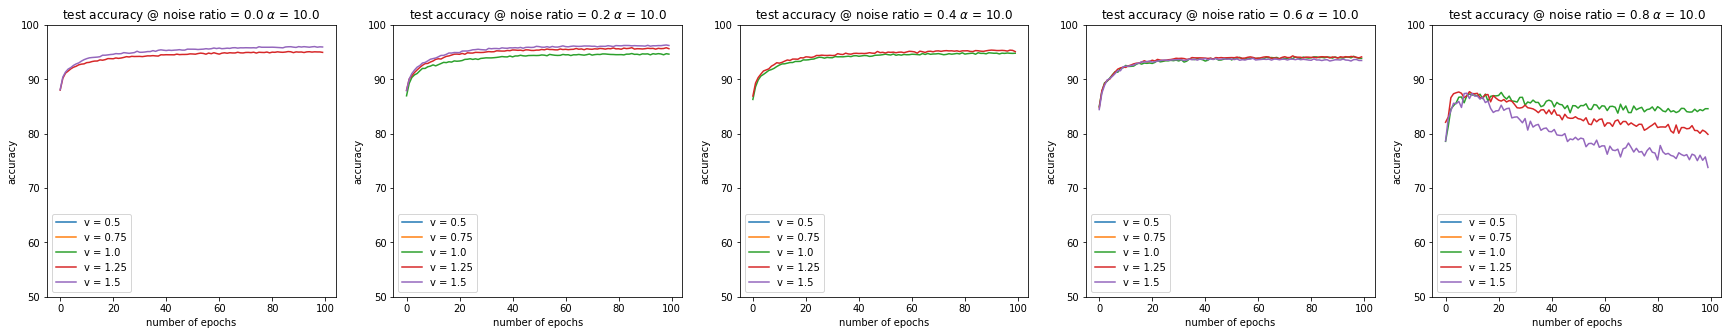

In [38]:
nr_list = sorted(list(sdf_mnist3['noise_ratio'].unique()))
alpha_list = sorted(list(sdf_mnist3['alpha'].unique()))
print(alpha_list)
for alpha in alpha_list:
    fig, ax = plt.subplots(1, len(nr_list), figsize=(30, 5))
    for i, nr in enumerate(nr_list):
        plot_along_epoch(case_dict_mnist3,
                         col_of_interests=['test_acc'],
                         key_var='v',
                         key_var_name='v',
                         key_var_filter=lambda x: x>=-1 and x<=8,
                         case_meta_filter=lambda x: (x['noise_ratio'] == nr and x['alpha'] == alpha), ax=ax[i])
        ax[i].set_title(r'test accuracy @ noise ratio = {} $\alpha$ = {}'.format(nr, alpha))
        ax[i].set_ylim([50, 100])
        ax[i].set_xlabel('number of epochs')
        ax[i].set_ylabel('accuracy')
    fig.show()